<h1 style="text-align:center;color:#131313"> Individual Assignment</h1>
<h2>Description</h2>
<p>here I</p>
<author>Mohammad Hadi adlipour Motlagh</author>

<h2>Data Exploration</h2>

### 1. Import all required libraries and datasets

In [1]:
# Set environment params
Sys.setenv(LANG='en')  # English

# Import libraries
# Data Manipulation
library(data.table)    # Data manipulate
library(dummies)       # Data processing
library(tidyverse)     # Data Manipulation
library(dplyr)         # Data Manipulation

# Visualizatin
library(ggplot2)       # Visualization
library(gridExtra)     # Visualization
library(plotrix)       # Draw circle


# Feature Selection
library(leaps)

# Machin Learnin Models
library(mlr)           # ML toolkit
library(caret)         # ML toolkit
library(rgl)           # 3D plots
library(e1071)         # Evaluation
library(kknn)          # kNN model
library(nnet)          # One-vs-All Logistic Regression
library(tree)          # CART model
library(randomForest)  # Bagging and RF
library(gbm)           # Boosting tree
library(glmnet)        # Rgid and Lasso Regression Models
library(pls)
library(mgcv)          # GAM
library(sp)
library(xgboost)
library(class)

# Evaluation
library(pROC)          # AUC, ROC

# Resize plot
library(repr)  # String and binary representations
# options(repr.plot.width=4, repr.plot.height=4)
#References
#https://book.huihoo.com/introduction-to-statistical-learning/code.html
#https://www.statlearning.com/resources-second-edition
R.version.string

dummies-1.5.6 provided by Decision Patterns


-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.1.1     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::between()   masks data.table::between()
x dplyr::filter()    masks stats::filter()
x dplyr::first()     masks data.table::first()
x dplyr::lag()       masks stats::lag()
x dplyr::last()      masks data.table::last()
x purrr::transpose() masks data.table::transpose()


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Loading required package: ParamHelpers

Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). D

[1] "R version 4.0.5 (2021-03-31)"

### 2. Loading The Data

In [2]:
# Input data
# cust_id                          : Custometr ID
# LIMIT_BAL                        : Limit of the Balance (float)
# SEX                              : Gender (binary)
# EDUCATION                        : Education level (Categorical)
# MARRIAGE                         : Status (binary)
# AGE                              : Age (integer)
# PAY_0                            : Payment of month 0 (integer)
# PAY_2                            : Payment of month 2 (integer)
# PAY_3                            : Payment of month 3 (integer)
# PAY_4                            : Payment of month 4 (integer)
# PAY_5                            : Payment of month 5 (integer)
# PAY_6                            : Payment of month 6 (integer)
# BILL_AMT1                        : Bill Amount of month 1 (integer)
# BILL_AMT2                        : Bill Amount of month 2 (integer)
# BILL_AMT3                        : Bill Amount of month 3 (integer)
# BILL_AMT4                        : Bill Amount of month 4 (integer)
# BILL_AMT5                        : Bill Amount of month 5 (integer)
# BILL_AMT6                        : Bill Amount of month 6 (integer)
# PAY_AMT1                         : ATM withdrawal Month 1 (integer)
# PAY_AMT2                         : ATM withdrawal Month 2 (integer)
# PAY_AMT3                         : ATM withdrawal Month 3 (integer)
# PAY_AMT4                         : ATM withdrawal Month 4 (integer)
# PAY_AMT5                         : ATM withdrawal Month 5 (integer)
# PAY_AMT6                         : ATM withdrawal Month 6 (integer)
# default.payment.next.month       : if the payment is default or no for next month (binary)
# reading the table
credit <- read.csv('./Data/credit_default_train.csv', row.names=1)
#straucture  of the data
str(credit)

'data.frame':	20000 obs. of  24 variables:
 $ LIMIT_BAL                 : int  70000 390000 60000 140000 50000 20000 50000 250000 320000 300000 ...
 $ SEX                       : int  1 2 1 2 1 1 1 1 2 1 ...
 $ EDUCATION                 : int  3 2 1 2 1 2 3 2 2 1 ...
 $ MARRIAGE                  : int  2 2 2 1 2 2 2 2 2 1 ...
 $ AGE                       : int  34 26 27 55 29 37 44 30 36 35 ...
 $ PAY_0                     : int  0 2 0 0 2 0 0 0 -2 0 ...
 $ PAY_2                     : int  0 2 0 0 2 0 0 0 -2 0 ...
 $ PAY_3                     : int  0 2 0 0 2 0 0 0 -2 0 ...
 $ PAY_4                     : int  0 0 0 0 0 0 2 -1 -2 0 ...
 $ PAY_5                     : int  0 0 0 0 0 0 0 2 -2 0 ...
 $ PAY_6                     : int  0 0 2 0 -2 0 0 -1 -2 0 ...
 $ BILL_AMT1                 : int  53972 185111 21387 108038 7881 20009 NA 5724 29862 91282 ...
 $ BILL_AMT2                 : int  23149 172865 22416 110216 10415 20602 50525 6729 33785 45885 ...
 $ BILL_AMT3                 : int 

### 3. Preprocessing dealing with NAs

In [3]:
print(paste('number of null values in LIMIT BALANC Column is equal to:',sum(is.na(credit$LIMIT_BAL))))
print(paste('number of null values in Gender Column is equal to:',sum(is.na(credit$SEX))))
print(paste('number of null values in EDUCATION Column is equal to:',sum(is.na(credit$ EDUCATION))))
print(paste('number of null values in MARRIAGE Column is equal to:',sum(is.na(credit$MARRIAGE))))
print(paste('number of null values in AGE Column is equal to:',sum(is.na(credit$AGE))))
print(paste('number of null values in PAY_0 Column is equal to:',sum(is.na(credit$PAY_0))))
print(paste('number of null values in PAY_2 Column is equal to:',sum(is.na(credit$PAY_2))))
print(paste('number of null values in PAY_3 Column is equal to:',sum(is.na(credit$PAY_3))))
print(paste('number of null values in PAY_4 Column is equal to:',sum(is.na(credit$PAY_4))))
print(paste('number of null values in PAY_5 Column is equal to:',sum(is.na(credit$PAY_5))))
print(paste('number of null values in PAY_5 Column is equal to:',sum(is.na(credit$PAY_6))))
print(paste('number of null values in LIMIT BILL_AMT1 is equal to:',sum(is.na(credit$BILL_AMT1))))
print(paste('number of null values in LIMIT BILL_AMT2 is equal to:',sum(is.na(credit$BILL_AMT2))))
print(paste('number of null values in LIMIT BILL_AMT3 is equal to:',sum(is.na(credit$BILL_AMT3))))
print(paste('number of null values in LIMIT BILL_AMT4 is equal to:',sum(is.na(credit$BILL_AMT4))))
print(paste('number of null values in LIMIT BILL_AMT5 is equal to:',sum(is.na(credit$BILL_AMT5))))
print(paste('number of null values in LIMIT BILL_AMT6 is equal to:',sum(is.na(credit$BILL_AMT6))))
print(paste('number of null values in LIMIT PAY_AMT1 is equal to:',sum(is.na(credit$PAY_AMT1))))
print(paste('number of null values in LIMIT PAY_AMT2 is equal to:',sum(is.na(credit$PAY_AMT2))))
print(paste('number of null values in LIMIT PAY_AMT3 is equal to:',sum(is.na(credit$PAY_AMT3))))
print(paste('number of null values in LIMIT PAY_AMT4 is equal to:',sum(is.na(credit$PAY_AMT4))))
print(paste('number of null values in LIMIT PAY_AMT5 is equal to:',sum(is.na(credit$PAY_AMT5))))
print(paste('number of null values in LIMIT PAY_AMT6 is equal to:',sum(is.na(credit$PAY_AMT6))))
print(paste('number of null values in default.payment.next.month Column is equal to:',sum(is.na(credit$default.payment.next.month))))

[1] "number of null values in LIMIT BALANC Column is equal to: 202"
[1] "number of null values in Gender Column is equal to: 161"
[1] "number of null values in EDUCATION Column is equal to: 199"
[1] "number of null values in MARRIAGE Column is equal to: 170"
[1] "number of null values in AGE Column is equal to: 214"
[1] "number of null values in PAY_0 Column is equal to: 195"
[1] "number of null values in PAY_2 Column is equal to: 219"
[1] "number of null values in PAY_3 Column is equal to: 217"
[1] "number of null values in PAY_4 Column is equal to: 199"
[1] "number of null values in PAY_5 Column is equal to: 185"
[1] "number of null values in PAY_5 Column is equal to: 203"
[1] "number of null values in LIMIT BILL_AMT1 is equal to: 185"
[1] "number of null values in LIMIT BILL_AMT2 is equal to: 209"
[1] "number of null values in LIMIT BILL_AMT3 is equal to: 175"
[1] "number of null values in LIMIT BILL_AMT4 is equal to: 165"
[1] "number of null values in LIMIT BILL_AMT5 is equal to: 1

In [4]:
#the maximum number of NA in one row
sum(is.na(credit[which.max(rowSums(is.na(credit))),]))

[1] 4

In [5]:
#Dealing With NAs
# here I use dplyr and fill NAs by most probable value of each comuln that can be median, average or the most popular
# fill NAs of all columns with Median except categorical and binary columns
# LIMIT_BAL
credit[is.na(credit$LIMIT_BAL),]$LIMIT_BAL<-median(credit$LIMIT_BAL, na.rm = TRUE)
# AGE
credit[is.na(credit$AGE),]$AGE<-median(credit$AGE, na.rm = TRUE)
# BILL_AMT1
credit[is.na(credit$BILL_AMT1),]$BILL_AMT1<-median(credit$BILL_AMT1, na.rm = TRUE)
# BILL_AMT2
credit[is.na(credit$BILL_AMT2),]$BILL_AMT2<-median(credit$BILL_AMT2, na.rm = TRUE)
# BILL_AMT3
credit[is.na(credit$BILL_AMT3),]$BILL_AMT3<-median(credit$BILL_AMT3, na.rm = TRUE)
# BILL_AMT4
credit[is.na(credit$BILL_AMT4),]$BILL_AMT4<-median(credit$BILL_AMT4, na.rm = TRUE)
# BILL_AMT5
credit[is.na(credit$BILL_AMT5),]$BILL_AMT5<-median(credit$BILL_AMT5, na.rm = TRUE)
# BILL_AMT6
credit[is.na(credit$BILL_AMT6),]$BILL_AMT6<-median(credit$BILL_AMT6, na.rm = TRUE)
# PAY_AMT1
credit[is.na(credit$PAY_AMT1),]$PAY_AMT1<-median(credit$PAY_AMT1, na.rm = TRUE)
# PAY_AMT2
credit[is.na(credit$PAY_AMT2),]$PAY_AMT2<-median(credit$PAY_AMT2, na.rm = TRUE)
# PAY_AMT3
credit[is.na(credit$PAY_AMT3),]$PAY_AMT3<-median(credit$PAY_AMT3, na.rm = TRUE)
# PAY_AMT4
credit[is.na(credit$PAY_AMT4),]$PAY_AMT4<-median(credit$PAY_AMT4, na.rm = TRUE)
# PAY_AMT5
credit[is.na(credit$PAY_AMT5),]$PAY_AMT5<-median(credit$PAY_AMT5, na.rm = TRUE)
# PAY_AMT6
credit[is.na(credit$PAY_AMT6),]$PAY_AMT6<-median(credit$PAY_AMT6, na.rm = TRUE)

In [6]:
# Create the function.
#https://www.tutorialspoint.com/r/r_mean_median_mode.htm
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

In [7]:
#fill NA of categoricals with Mod
# PAY_0
credit[is.na(credit$PAY_0),]$PAY_0<-getmode(credit$PAY_0)
# PAY_2
credit[is.na(credit$PAY_2),]$PAY_2<-getmode(credit$PAY_2)
# PAY_3
credit[is.na(credit$PAY_3),]$PAY_3<-getmode(credit$PAY_3)
# PAY_4
credit[is.na(credit$PAY_4),]$PAY_4<-getmode(credit$PAY_4)
# PAY_5
credit[is.na(credit$PAY_5),]$PAY_5<-getmode(credit$PAY_5)
# PAY_6
credit[is.na(credit$PAY_6),]$PAY_6<-getmode(credit$PAY_6)
# SEX
credit[is.na(credit$SEX),]$SEX<-getmode(credit$SEX)
# EDUCATION
credit[is.na(credit$EDUCATION),]$EDUCATION<-getmode(credit$EDUCATION)
# PAY_6
credit[is.na(credit$MARRIAGE),]$MARRIAGE<-getmode(credit$MARRIAGE)

In [8]:
cat_list<-c('EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6')

# Convert categorical variables to dummy variables
dummy_list <- list()
for (v in cat_list) {
    # Create dummy variables
    tmp <- dummy(v, data=credit, sep="_", drop=TRUE)
    # Drop the 1st column
    tmp <- tmp[, 2:ncol(tmp), drop=FALSE]
    # Store the results
    dummy_list[[length(dummy_list)+1]] <- tmp
}

# Combine the dummy variables
dummy_df <- do.call(cbind, dummy_list)
# Add the dummy variables to the data frame
credit <- cbind(credit, dummy_df)

# Drop the original variable
credit <- credit[, !(names(credit) %in% cat_list)]

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts ar

In [9]:
# renaming the Column of Target Variable
credit<-credit%>%rename(default=default.payment.next.month)
#Saving the Base Table
fwrite(credit,'./Data/BaseTable.csv')

### 4. Data Exploration

In [10]:
# reading the table
DF <- read.csv('./Data/BaseTable.csv')
#straucture  of the data
str(DF)

'data.frame':	20000 obs. of  83 variables:
 $ LIMIT_BAL  : num  70000 390000 60000 140000 50000 20000 50000 250000 320000 300000 ...
 $ SEX        : int  1 2 1 2 1 1 1 1 2 1 ...
 $ AGE        : int  34 26 27 55 29 37 44 30 36 35 ...
 $ BILL_AMT1  : int  53972 185111 21387 108038 7881 20009 22221 5724 29862 91282 ...
 $ BILL_AMT2  : int  23149 172865 22416 110216 10415 20602 50525 6729 33785 45885 ...
 $ BILL_AMT3  : int  23968 153795 23444 84516 3997 21255 51463 4973 4900 35329 ...
 $ BILL_AMT4  : int  25559 140387 26038 72391 1047 19105 49952 9693 15813 29368 ...
 $ BILL_AMT5  : int  26134 128112 28607 61298 0 19609 19584 799 0 18833 ...
 $ BILL_AMT6  : int  26715 115514 27997 62193 0 19283 19080 4295 0 93329 ...
 $ PAY_AMT1   : num  1700 5000 1378 4200 3000 ...
 $ PAY_AMT2   : num  1500 3000 1406 2822 0 ...
 $ PAY_AMT3   : num  2000 5000 3000 2336 1000 ...
 $ PAY_AMT4   : int  1000 4548 3000 2588 0 1000 837 0 0 1250 ...
 $ PAY_AMT5   : int  1000 4100 0 2250 0 900 700 4305 0 80934 ...

In [11]:
sum(is.na(DF))

[1] 0

NULL

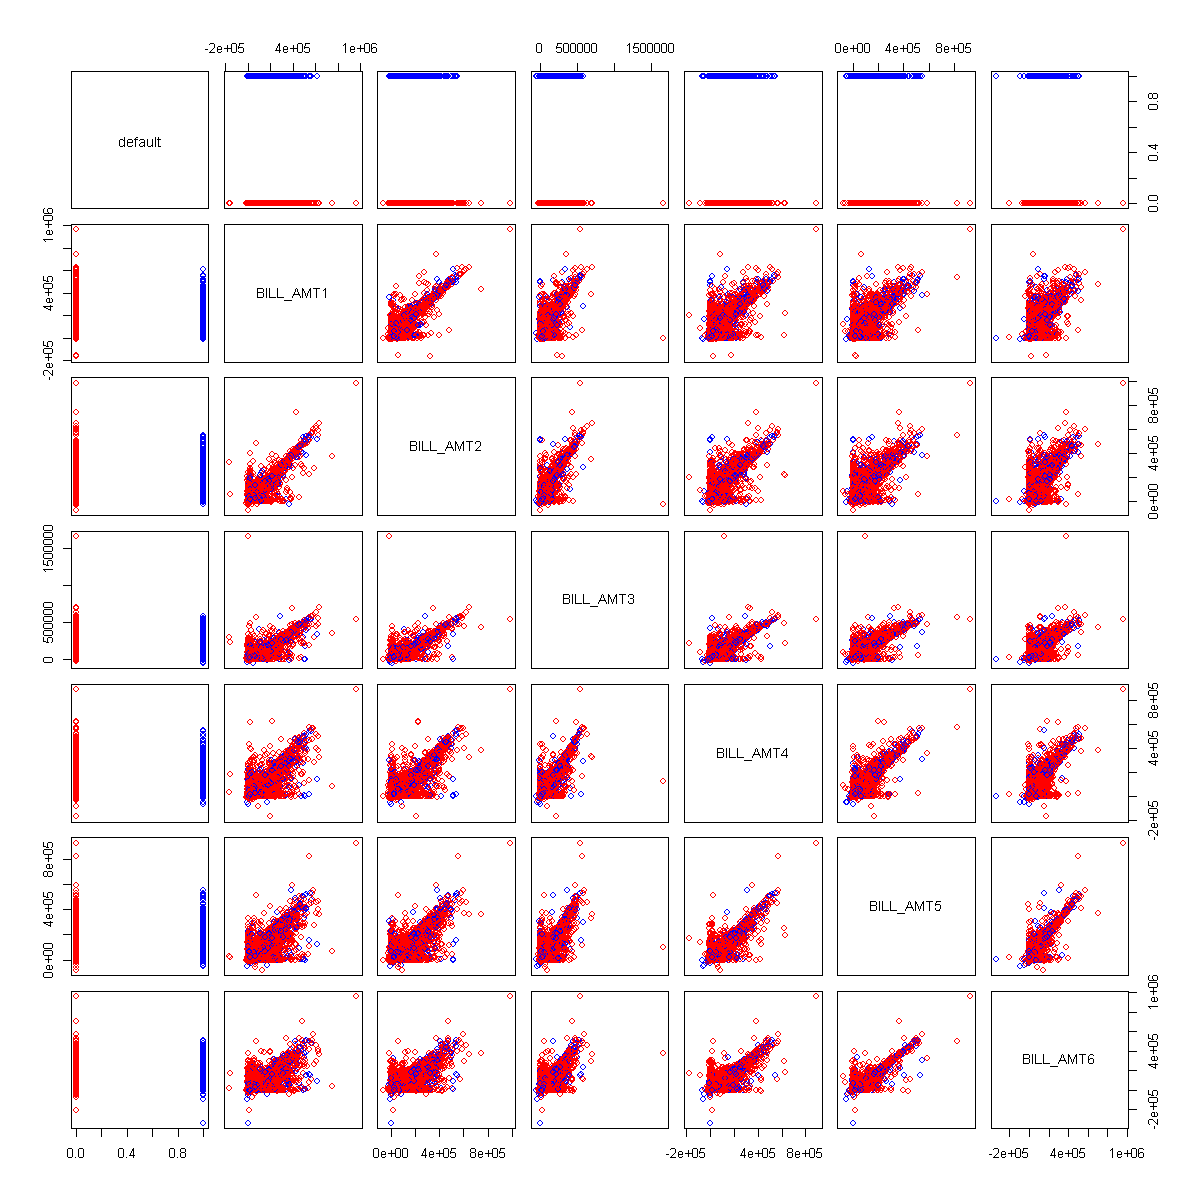

In [127]:
# Pair plot Default VS Bill
options(repr.plot.width=10, repr.plot.height=10)
cols <- rep('blue', nrow(DF))  # no default
cols[DF$default == 0] <- 'red'  # Default
D.VS.Bill<-pairs(default ~ BILL_AMT1 + BILL_AMT2 +
                 BILL_AMT3 + BILL_AMT4 + BILL_AMT5 + BILL_AMT6 , data=DF, col=cols)
D.VS.Bill

NULL

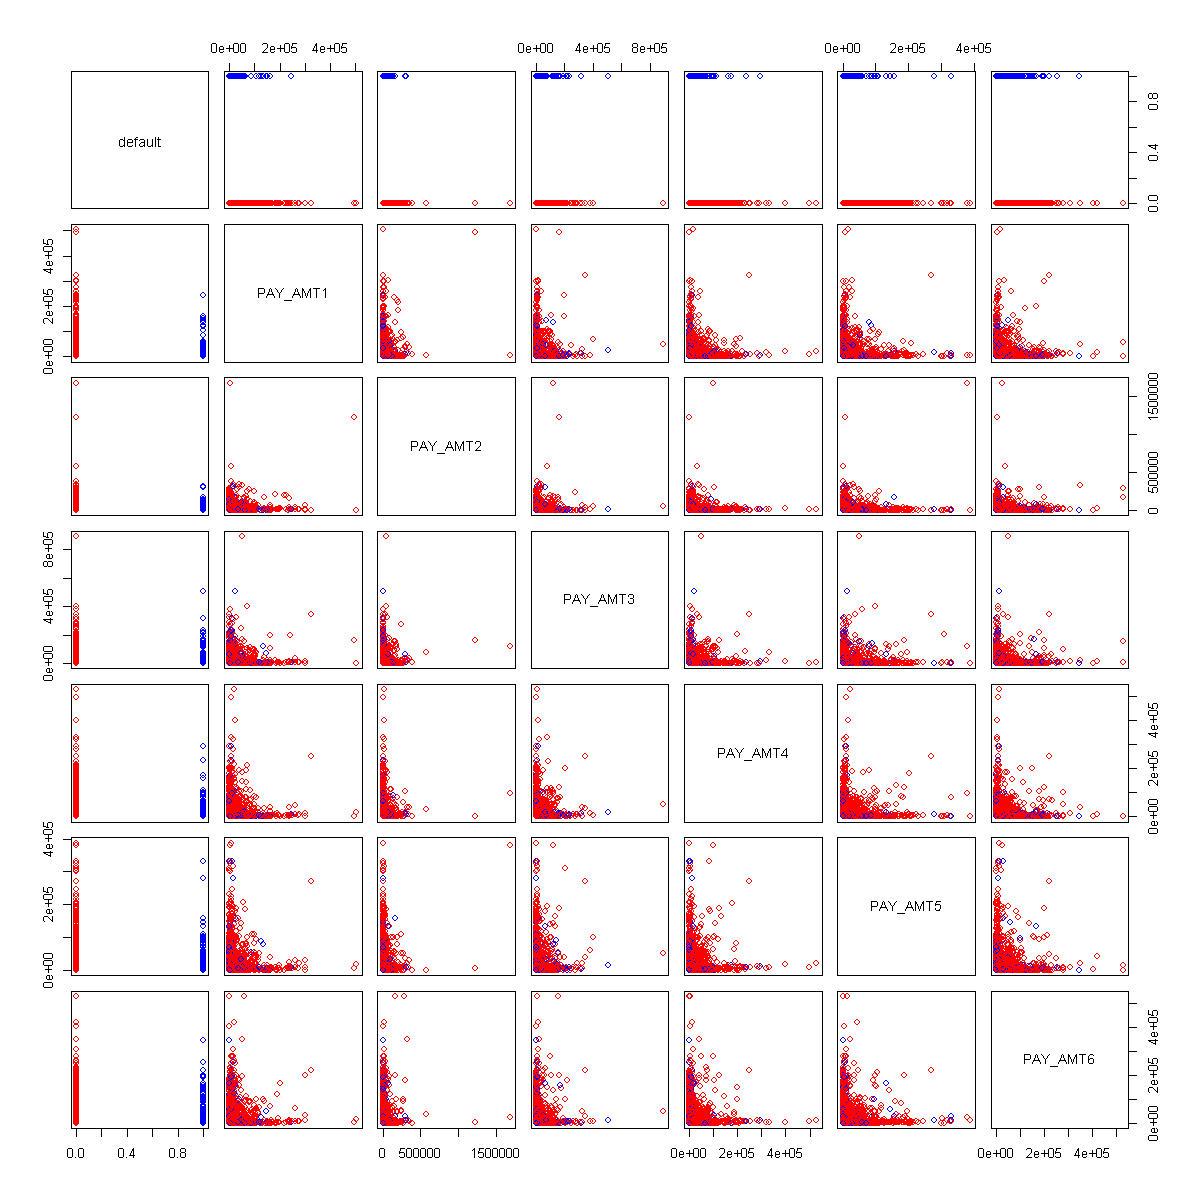

In [128]:
# Pair plot Default VS PAY_AMT
options(repr.plot.width=10, repr.plot.height=10)
cols <- rep('blue', nrow(DF))  # no default
cols[DF$default == 0] <- 'red'  # Default
D.VS.PAY_AMT<-pairs(default ~ PAY_AMT1 + PAY_AMT2 +
                 PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6 , data=DF, col=cols)
D.VS.PAY_AMT

NULL

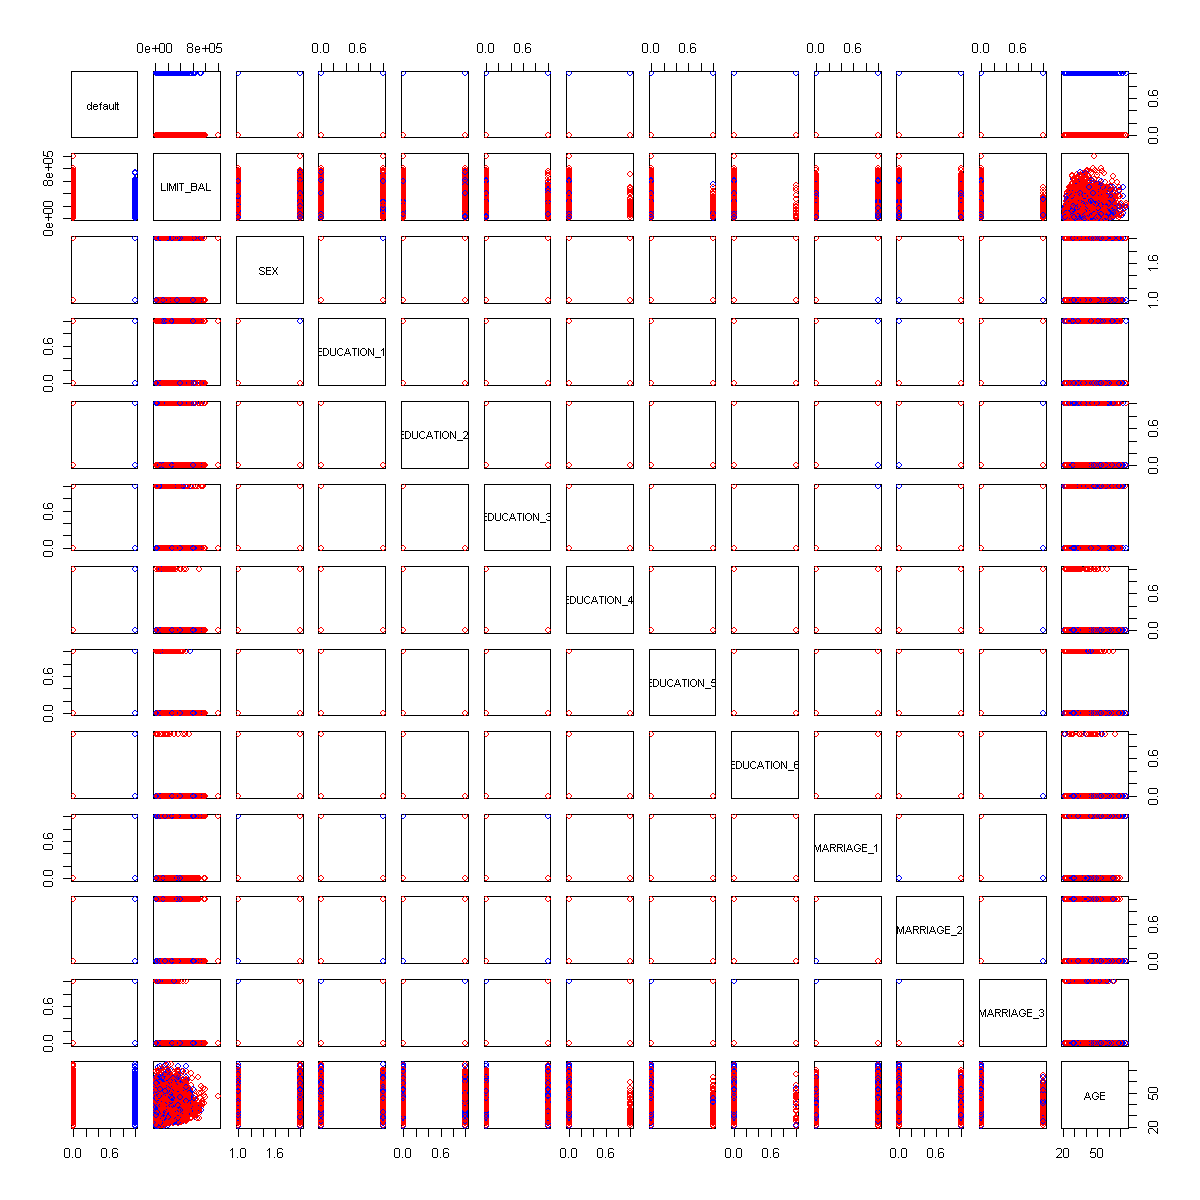

In [129]:
# Pair plot Default VS all rest
options(repr.plot.width=10, repr.plot.height=10)
cols <- rep('blue', nrow(DF))  # no default
cols[DF$default == 0] <- 'red'  # Default
D.VS.R<-pairs(default ~ LIMIT_BAL + SEX + 
                 EDUCATION_1 + EDUCATION_2+EDUCATION_3+EDUCATION_4+EDUCATION_5+EDUCATION_6+
              MARRIAGE_1 + MARRIAGE_2+ MARRIAGE_3 + AGE  , data=DF, col=cols)
D.VS.R

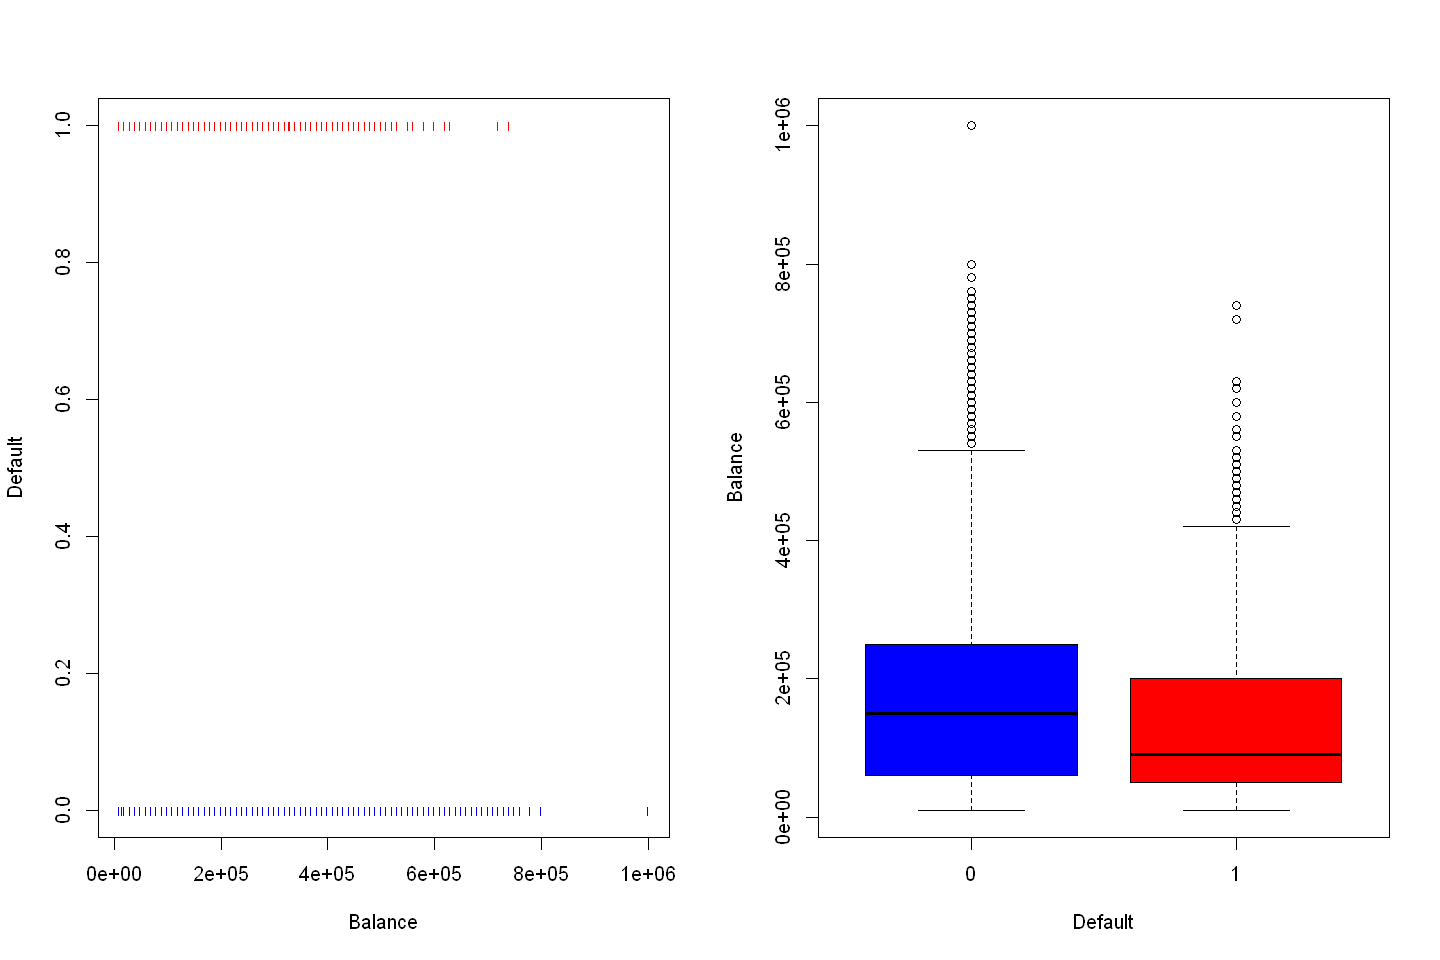

In [31]:
# Relationship between balance and default
options(repr.plot.width=12, repr.plot.height=8)
cols <- rep('blue', nrow(DF))  # Not default
cols[DF$default == 1] <- 'red'  # Default

par(mfrow=c(1, 2))

plot(x=DF$LIMIT_BAL, y=DF$default,  # Plot the data
     xlab='Balance', ylab='Default',
     pch='|', cex=0.5, col=cols)

boxplot(LIMIT_BAL ~ default, data=DF,
        col=c('blue', 'red'),
        xlab='Default', ylab='Balance')

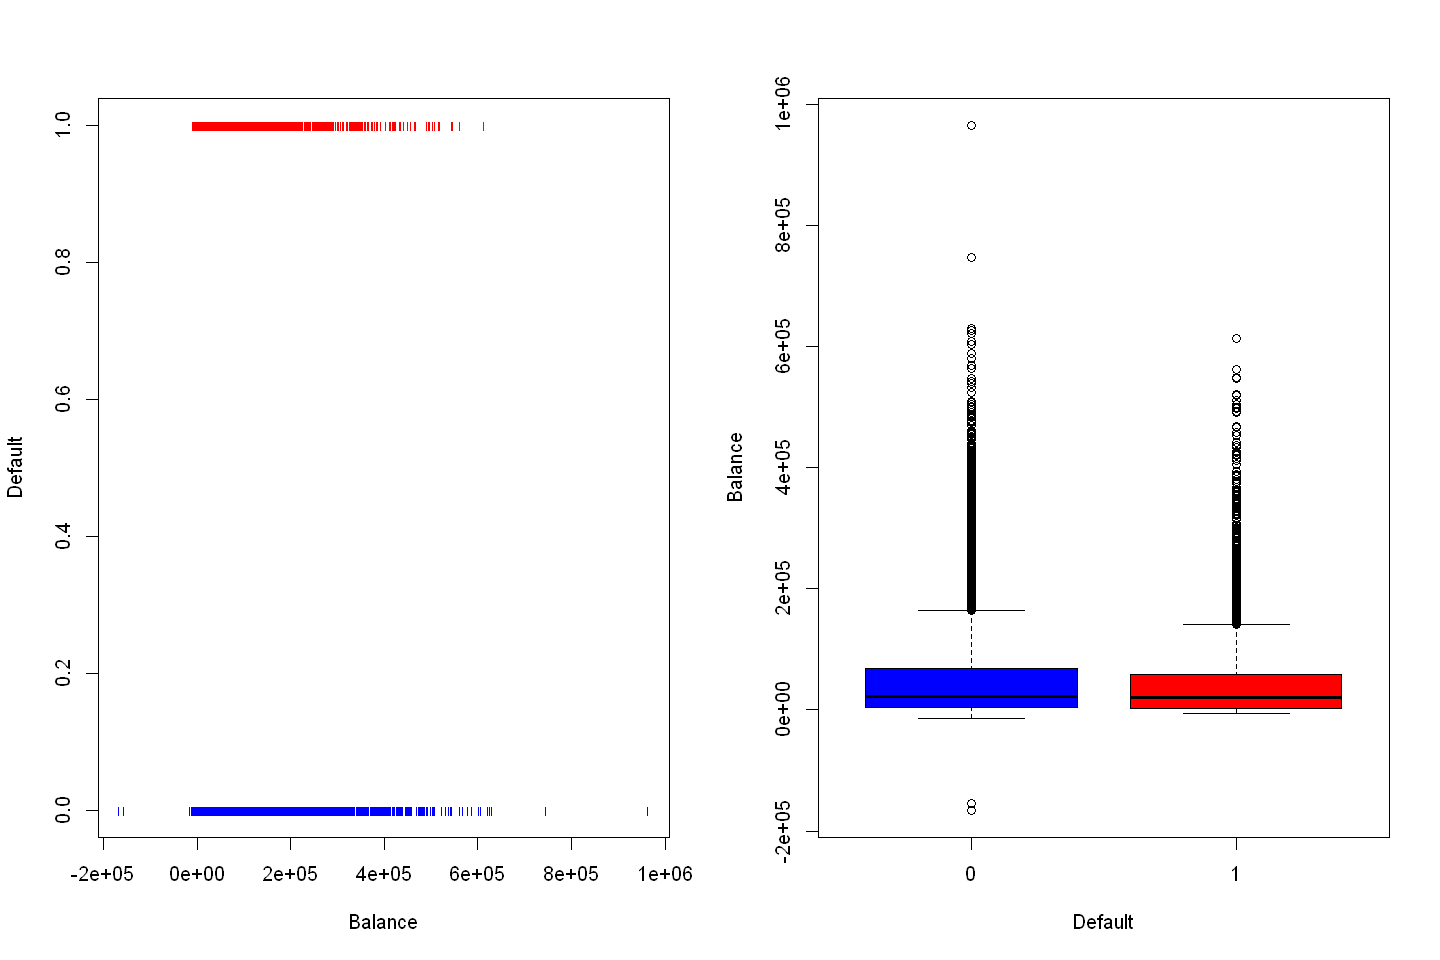

In [38]:
# Relationship between balance and default
options(repr.plot.width=12, repr.plot.height=8)
cols <- rep('blue', nrow(DF))  # Not default
cols[DF$default == 1] <- 'red'  # Default

par(mfrow=c(1, 2))

plot(x=DF$BILL_AMT1, y=DF$default,  # Plot the data
     xlab='Balance', ylab='Default',
     pch='|', cex=0.5, col=cols)

boxplot(BILL_AMT1 ~ default, data=DF,
        col=c('blue', 'red'),
        xlab='Default', ylab='Balance')

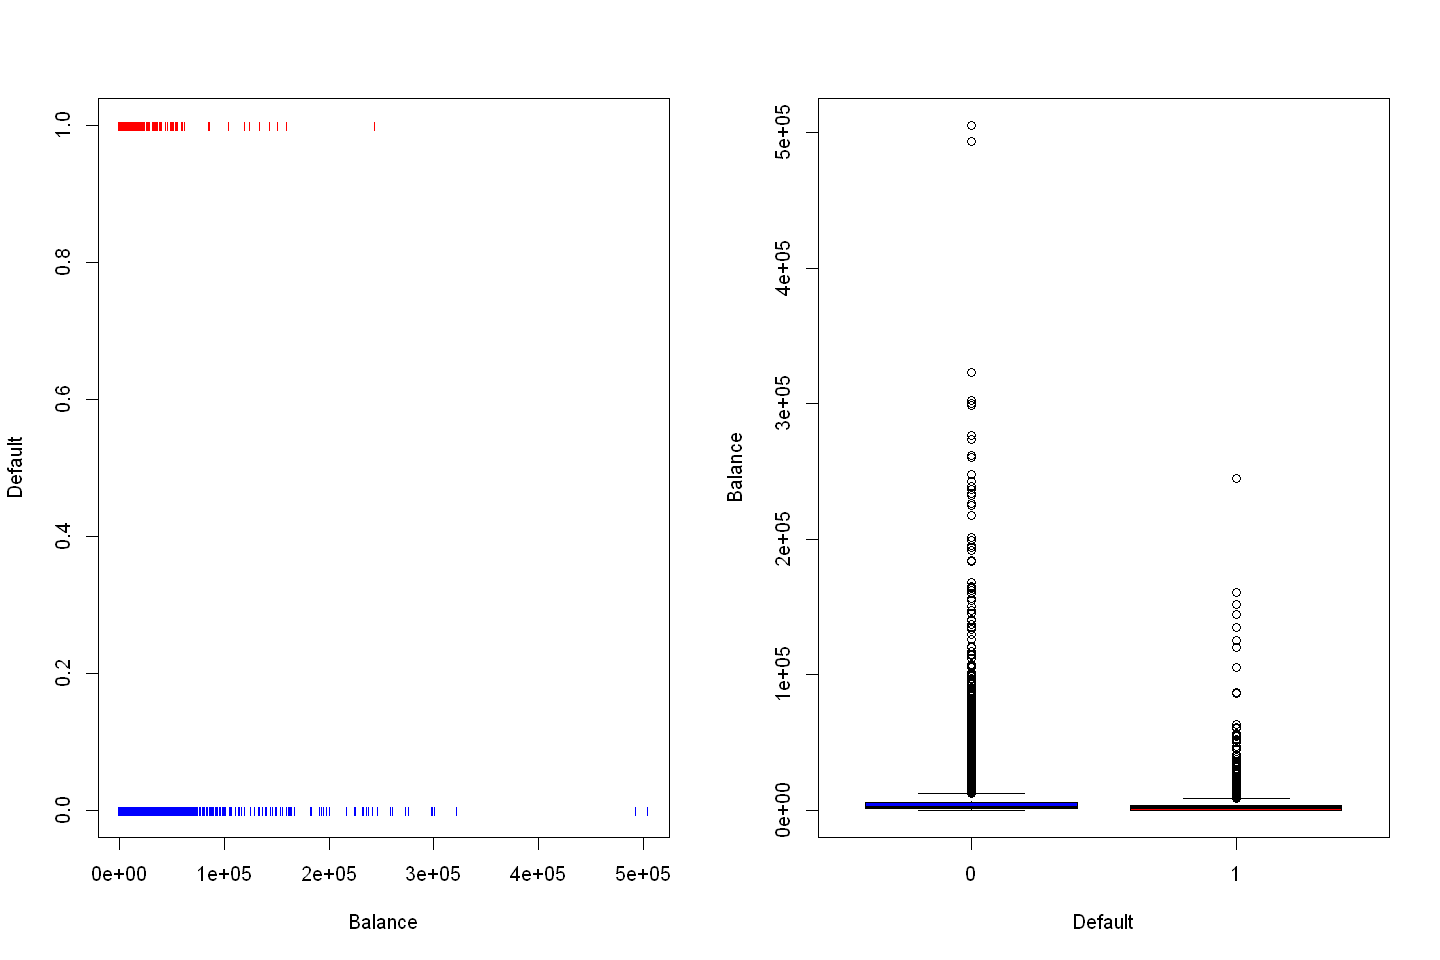

In [37]:
# Relationship between balance and default
options(repr.plot.width=12, repr.plot.height=8)
cols <- rep('blue', nrow(DF))  # Not default
cols[DF$default == 1] <- 'red'  # Default

par(mfrow=c(1, 2))

plot(x=DF$PAY_AMT1, y=DF$default,  # Plot the data
     xlab='Balance', ylab='Default',
     pch='|', cex=0.5, col=cols)

boxplot(PAY_AMT1 ~ default, data=DF,
        col=c('blue', 'red'),
        xlab='Default', ylab='Balance')

In [39]:
set.seed(613)
#seting the row indexes
index <- sample(1:nrow(DF), round(0.3 * nrow(DF), 0))
#spliting data based on the index
train <- DF[index, ]
test <- DF[-index, ]
#Selecting independent columns
selected_columns<-c(names(DF%>%select(-default)))


## Application of Models

### 1. Feature Selection

#### 1.1 exhaustive

In [12]:
# applying the forward feature selection to data
regfit.fwd=regsubsets(default~.,data=DF,method='forward',nvmax=83)
# summary of forward featur selection
reg.summary.fwd=summary(regfit.fwd)

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
"2  linear dependencies found"


Reordering variables and trying again:


Warning message in rval$lopt[] <- rval$vorder[rval$lopt]:
"number of items to replace is not a multiple of replacement length"


In [13]:
# coeficient names for forward feature selection
names(reg.summary.fwd)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [14]:
#summary of RSQ for forward feature selection
reg.summary.fwd$rsq

[1] 0.1189547 0.1480617 0.1597392 0.1691998 0.1775814 0.1817638 0.1860824
 [8] 0.1882517 0.1899560 0.1913515 0.1928024 0.1939373 0.1947564 0.1960169
[15] 0.1967430 0.1974479 0.1980586 0.1985120 0.1989526 0.1993834 0.1997456
[22] 0.2000742 0.2003700 0.2006369 0.2008918 0.2010951 0.2012823 0.2014700
[29] 0.2016468 0.2017839 0.2019047 0.2020238 0.2022368 0.2023500 0.2024701
[36] 0.2025863 0.2026955 0.2028673 0.2029900 0.2030895 0.2031833 0.2032529
[43] 0.2033083 0.2033921 0.2034450 0.2034917 0.2035364 0.2035787 0.2036185
[50] 0.2036555 0.2036982 0.2037335 0.2037598 0.2037846 0.2041422 0.2041656
[57] 0.2041842 0.2041979 0.2042113 0.2042305 0.2042400 0.2042490 0.2042577
[64] 0.2042725 0.2042813 0.2042892 0.2042956 0.2043062 0.2043109 0.2043155
[71] 0.2043200 0.2043970 0.2044012 0.2044037 0.2044057 0.2044077 0.2044089
[78] 0.2044095 0.2044095 0.2044095

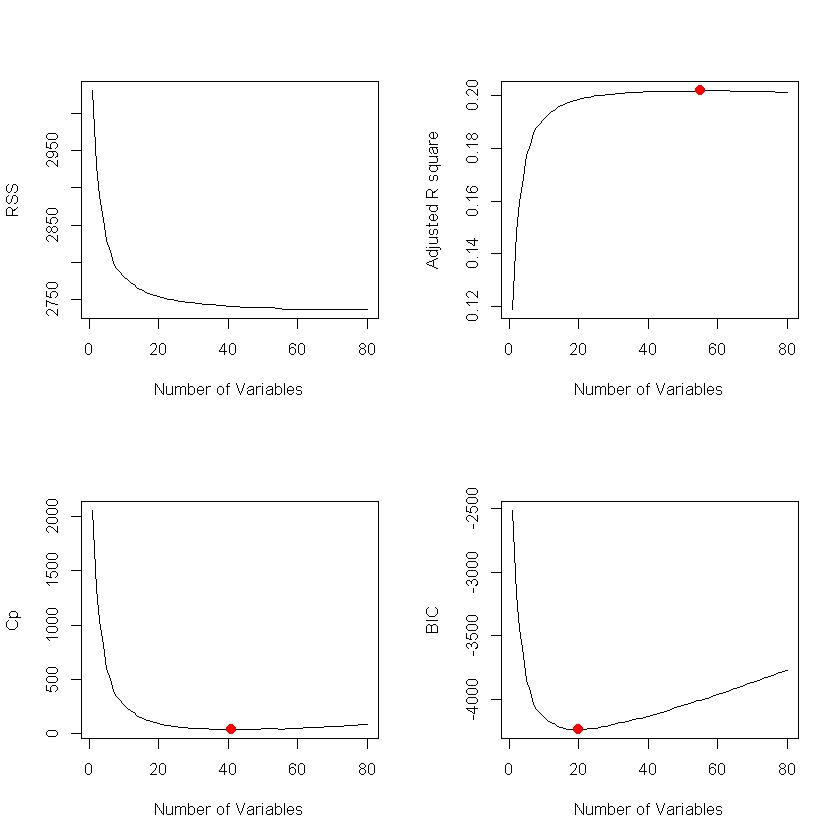

In [15]:
#plot 4 diferent coeficient to show the best number of the features in diferent coeficients
#paring axies to 4 cells
par(mfrow=c(2,2))
#plot the RSS
plot(reg.summary.fwd$rss,xlab='Number of Variables',ylab='RSS',type='l')
# Plot the adjusted rate 2 
plot(reg.summary.fwd$adjr2,xlab='Number of Variables',ylab='Adjusted R square',type='l')
# define the optimum point of adjusted rate 2
points(which.max(reg.summary.fwd$adjr2),reg.summary.fwd$adjr2[which.max(reg.summary.fwd$adjr2)],col='red',cex=2,pch=20)
#plot the cp
plot(reg.summary.fwd$cp,xlab="Number of Variables",ylab="Cp",type='l')
# define the optimum point of cp
points(which.min(reg.summary.fwd$cp),reg.summary.fwd$cp[which.min(reg.summary.fwd$cp)],col="red",cex=2,pch=20)
# plot the Bic 
plot(reg.summary.fwd$bic,xlab="Number of Variables",ylab="BIC",type='l')
# define the optimum point of bic
points(which.min(reg.summary.fwd$bic),reg.summary.fwd$bic[which.min(reg.summary.fwd$bic)],col="red",cex=2,pch=20)

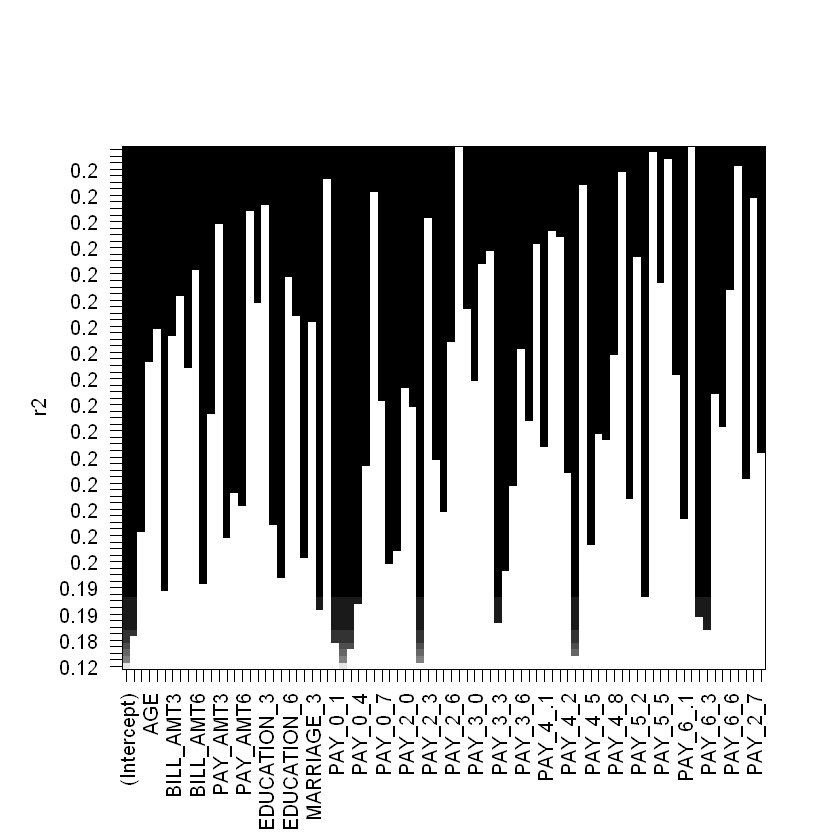

In [16]:
# ploting the R square of forward model
plot(regfit.fwd,scale="r2")

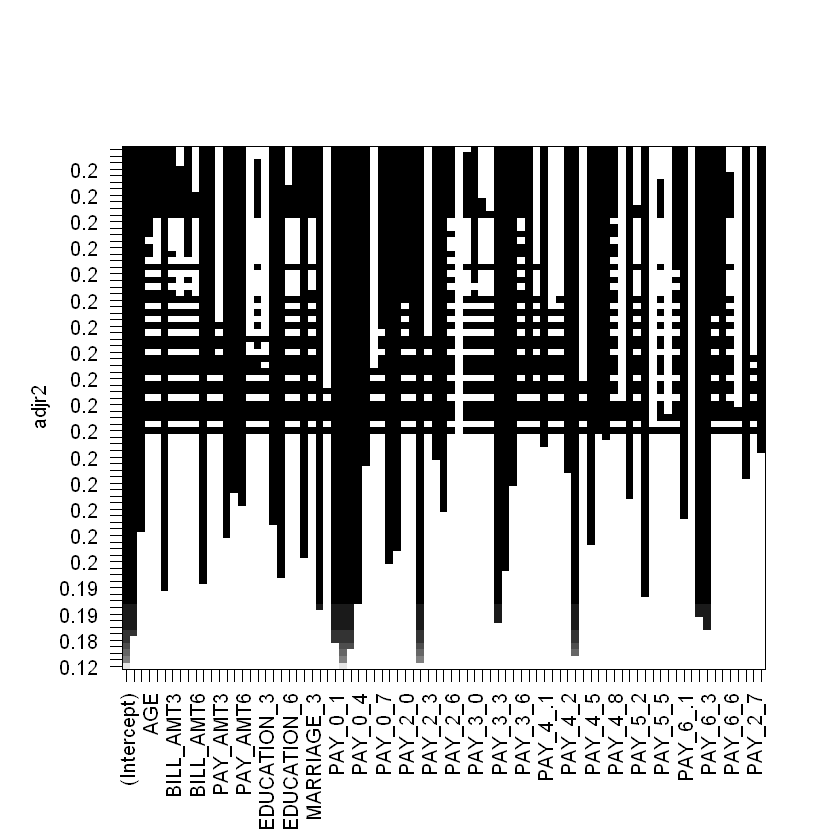

In [17]:
# ploting the adjusted rate 2 of forward model
plot(regfit.fwd,scale="adjr2")

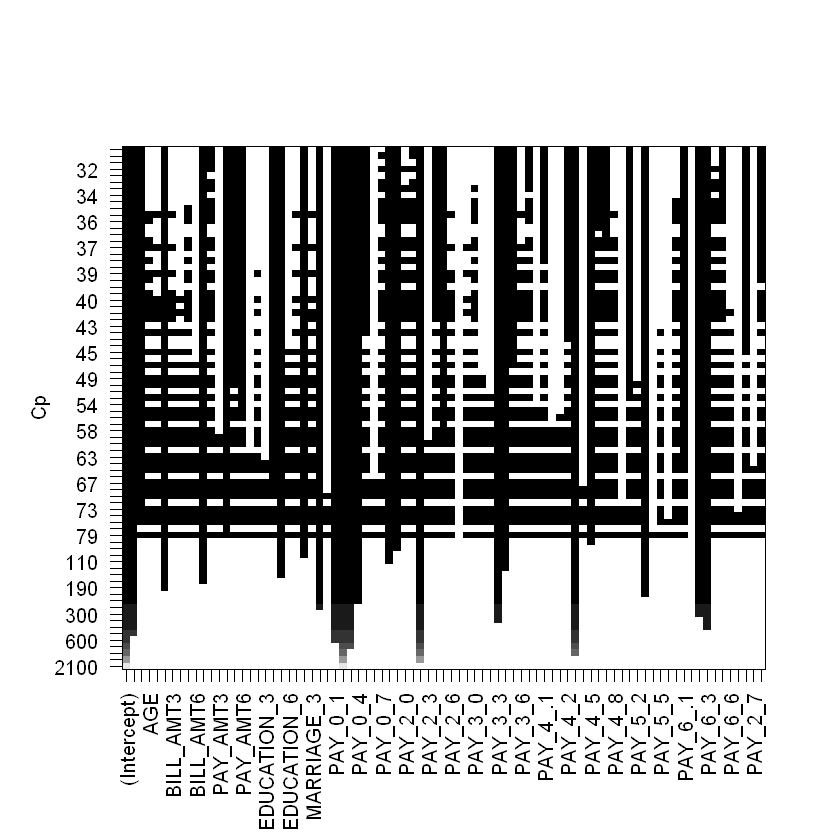

In [18]:
# ploting the CP of forward model
plot(regfit.fwd,scale="Cp")

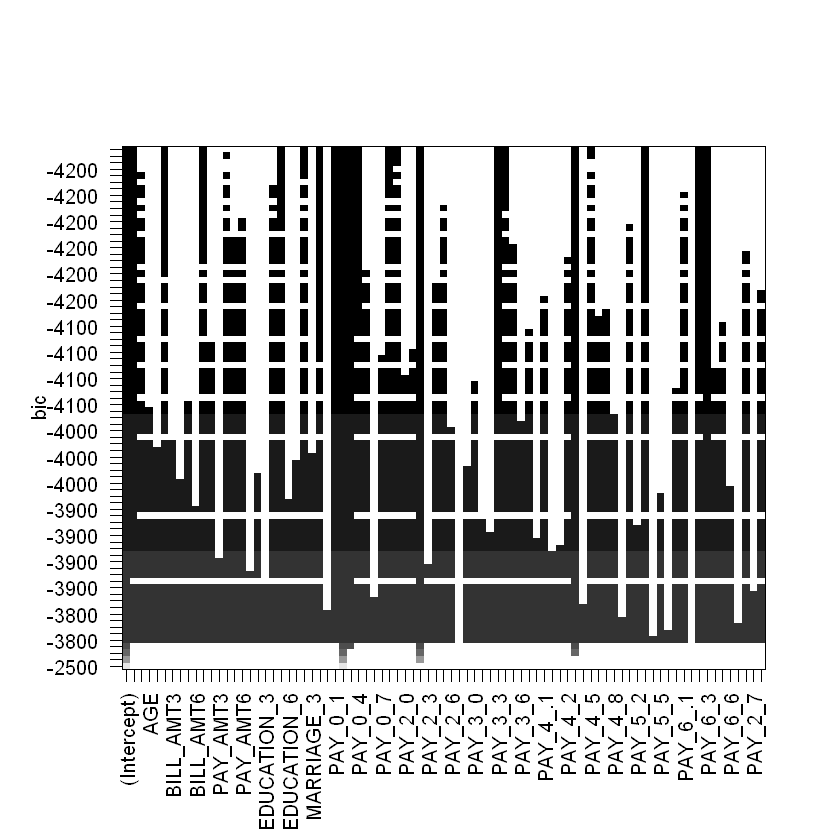

In [19]:
# ploting the bicof forward model
plot(regfit.fwd,scale="bic")

In [20]:
#storing the feature selected based on the forward model by cp coeficient
selection.fwd.cp=names(coef(regfit.fwd,which.min(reg.summary.fwd$cp)))[-1]
#displaying the coeficient and variables name for forward feature selection for CP
coef(regfit.fwd,which.min(reg.summary.fwd$cp))

(Intercept)     LIMIT_BAL           SEX     BILL_AMT2      PAY_AMT1 
 2.219348e-01 -1.977886e-07 -1.569089e-02  1.903247e-07 -7.147051e-07 
     PAY_AMT2      PAY_AMT4      PAY_AMT5      PAY_AMT6   EDUCATION_4 
-2.394341e-07 -6.508051e-07 -3.122601e-07 -2.904807e-07 -1.165490e-01 
  EDUCATION_5    MARRIAGE_2      PAY_0_.1       PAY_0_1       PAY_0_2 
-1.147618e-01 -1.833222e-02  8.554171e-02  1.508471e-01  4.392918e-01 
      PAY_0_3       PAY_0_4       PAY_0_5       PAY_0_8      PAY_2_.1 
 4.809219e-01  3.427926e-01  2.809323e-01  5.914764e-01 -3.282799e-02 
      PAY_2_1       PAY_2_2       PAY_2_4       PAY_2_5       PAY_3_3 
-9.884947e-02  4.540715e-02 -1.418579e-01  2.772128e-01  9.067260e-02 
      PAY_3_4       PAY_3_5       PAY_3_7      PAY_4_.1       PAY_4_2 
-2.979978e-02  7.733736e-02 -3.296002e-02 -2.033017e-02  9.032825e-02 
      PAY_4_3       PAY_4_5       PAY_4_6       PAY_4_7       PAY_5_0 
 1.720708e-02 -3.188897e-01 -1.982338e-01  1.620096e-01 -3.613179e-02 
      PAY_5_3      PAY_6_.1       PAY_6_2       PAY_6_3       PAY_6_5 
-1.209753e-02 -1.235501e-02  8.399887e-02  1.498589e-01 -5.198800e-03 
      PAY_6_8       PAY_5_8 
 9.157990e-01 -6.008293e-01

In [21]:
#storing the feature selected based on the forward model by bic coeficient
selection.fwd.bic=names(coef(regfit.fwd,which.min(reg.summary.fwd$bic)))[-1]
#displaying the coeficient and variables name for forward feature selection for bic
coef(regfit.fwd,which.min(reg.summary.fwd$bic))

(Intercept)     LIMIT_BAL     BILL_AMT2      PAY_AMT1   EDUCATION_5 
 1.743071e-01 -2.211553e-07  9.971899e-08 -8.863271e-07 -1.218790e-01 
   MARRIAGE_2      PAY_0_.1       PAY_0_1       PAY_0_2       PAY_0_3 
-1.937847e-02  8.053877e-02  1.575719e-01  4.556282e-01  5.089649e-01 
      PAY_0_4       PAY_0_8      PAY_2_.1       PAY_2_2       PAY_3_3 
 3.402339e-01  5.995319e-01 -3.841081e-02  6.291230e-02  1.264752e-01 
      PAY_3_4       PAY_4_3       PAY_4_5       PAY_5_3       PAY_6_2 
 2.851386e-02  1.350166e-03 -3.209664e-01 -4.084315e-03  1.273825e-01 
      PAY_6_3 
 1.826662e-01

#### 1.2 backward feature selection

In [22]:
# applying the backward feature selection to data
regfit.bwd=regsubsets(default~.,data=DF,method='backward')
# summary of backward featur selection
reg.summary.bwd=summary(regfit.bwd)

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
"2  linear dependencies found"


Reordering variables and trying again:


In [23]:
# coeficient names for backward feature selection
names(reg.summary.bwd)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [24]:
#summary of RSQ for backward feature selection
reg.summary.bwd$rsq

[1] 0.1189547 0.1399961 0.1619632 0.1748322 0.1794901 0.1835715 0.1871795
[8] 0.1889143 0.1906290

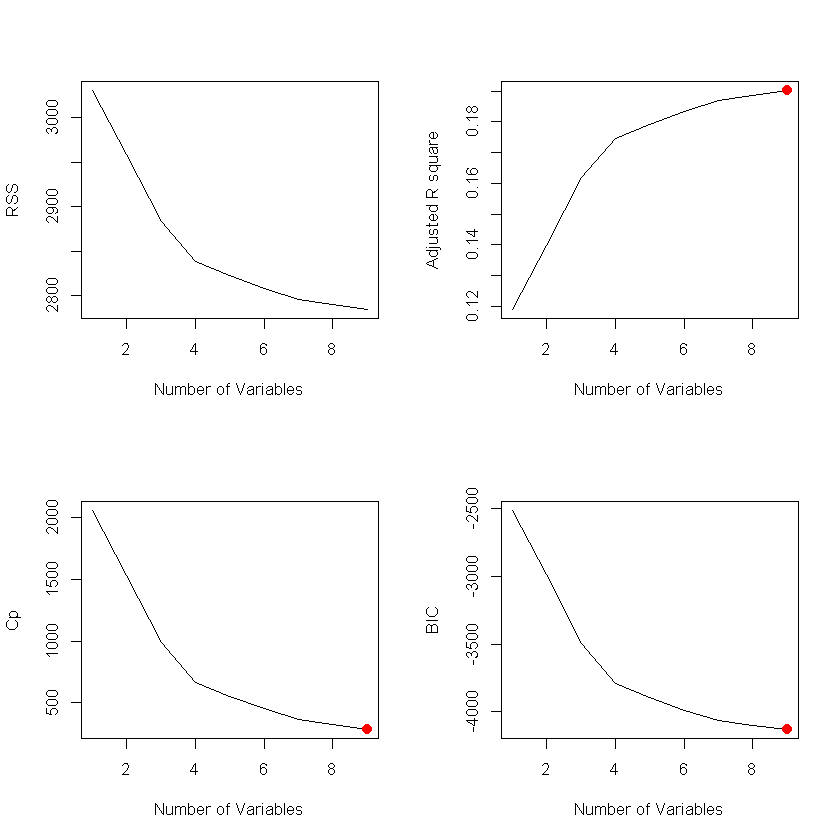

In [25]:
#plot 4 diferent coeficient to show the best number of the features in diferent coeficients
#paring axies to 4 cells
par(mfrow=c(2,2))
#plot the RSS
plot(reg.summary.bwd$rss,xlab='Number of Variables',ylab='RSS',type='l')
# Plot the adjusted rate 2 
plot(reg.summary.bwd$adjr2,xlab='Number of Variables',ylab='Adjusted R square',type='l')
# define the optimum point of adjusted rate 2
points(which.max(reg.summary.bwd$adjr2),reg.summary.bwd$adjr2[which.max(reg.summary.bwd$adjr2)],col='red',cex=2,pch=20)
#plot the cp
plot(reg.summary.bwd$cp,xlab="Number of Variables",ylab="Cp",type='l')
# define the optimum point of cp
points(which.min(reg.summary.bwd$cp),reg.summary.bwd$cp[which.min(reg.summary.bwd$cp)],col="red",cex=2,pch=20)
# plot the Bic 
plot(reg.summary.bwd$bic,xlab="Number of Variables",ylab="BIC",type='l')
# define the optimum point of bic
points(which.min(reg.summary.bwd$bic),reg.summary.bwd$bic[which.min(reg.summary.bwd$bic)],col="red",cex=2,pch=20)

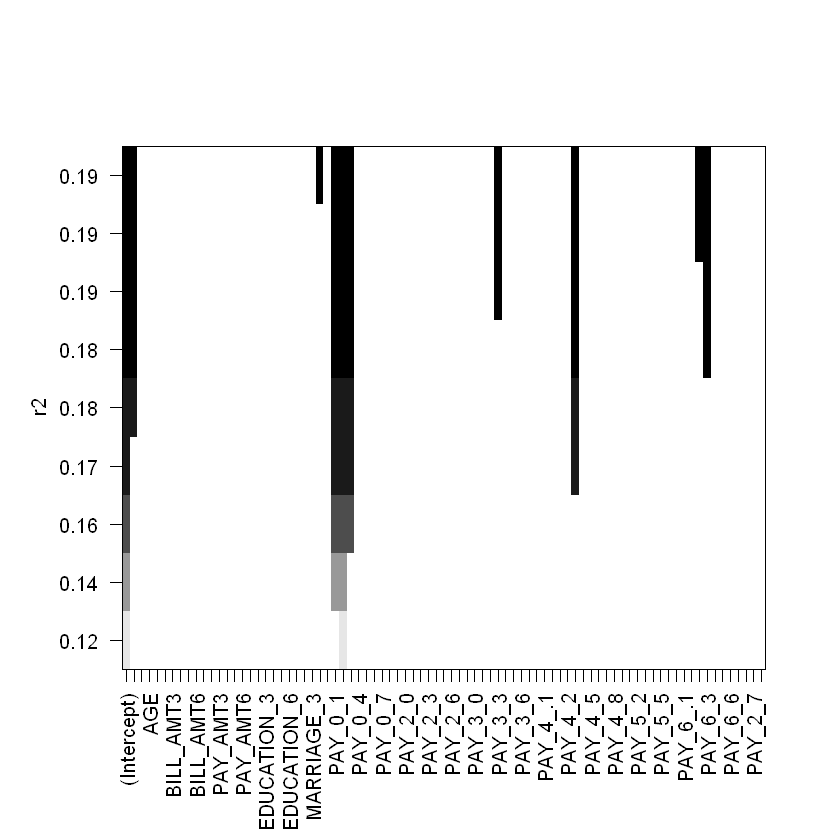

In [26]:
# ploting the R square of backward model
plot(regfit.bwd,scale="r2")

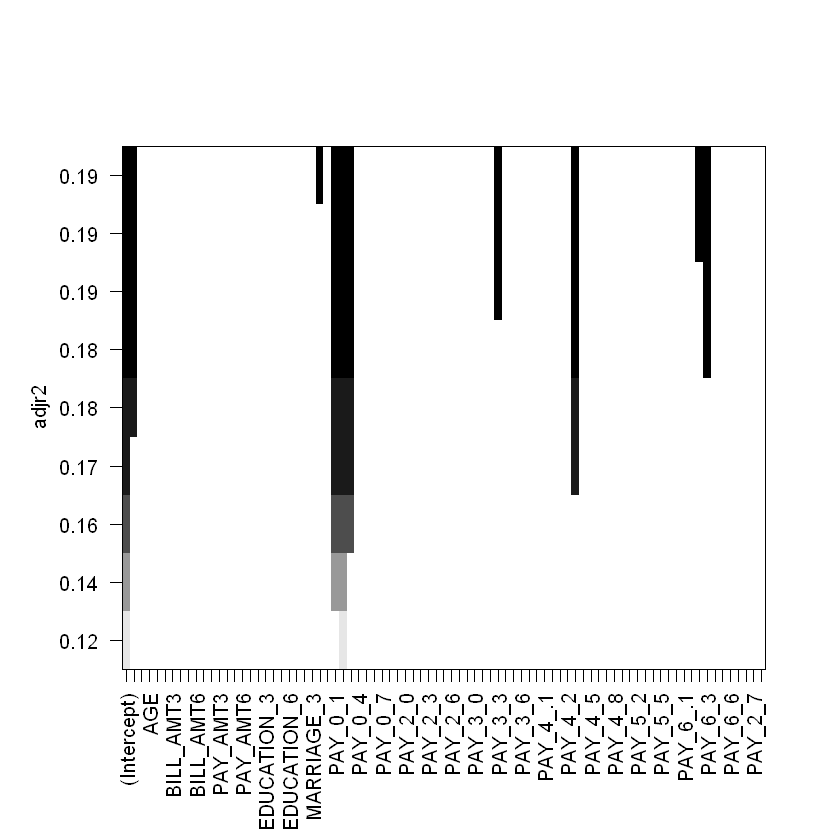

In [27]:
# ploting the adjusted rate 2 of backward model
plot(regfit.bwd,scale="adjr2")

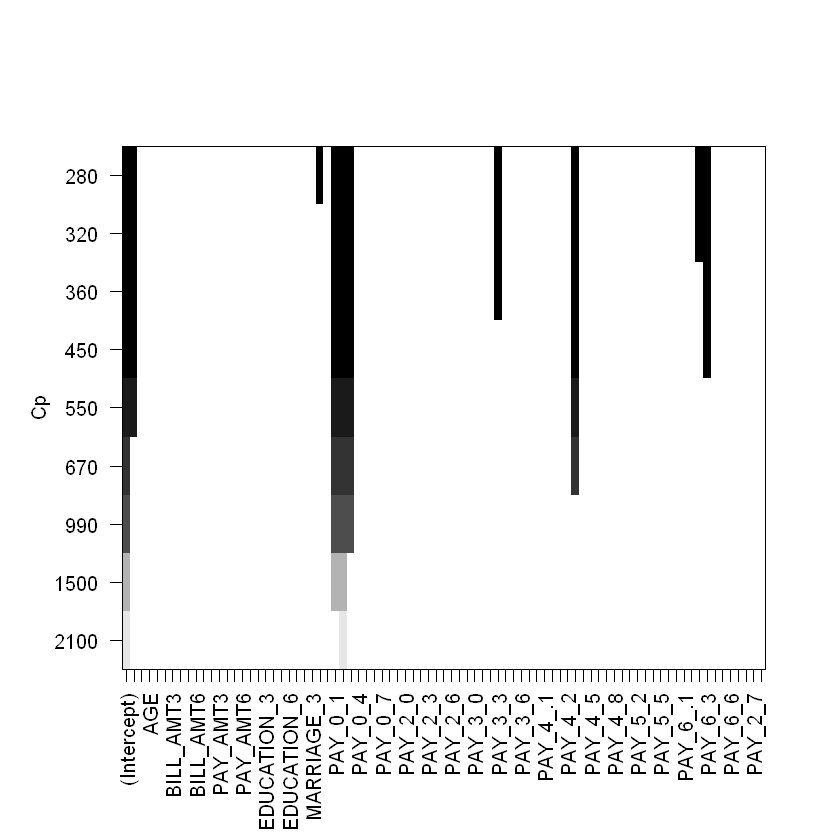

In [28]:
# ploting the CP of backward model
plot(regfit.bwd,scale="Cp")

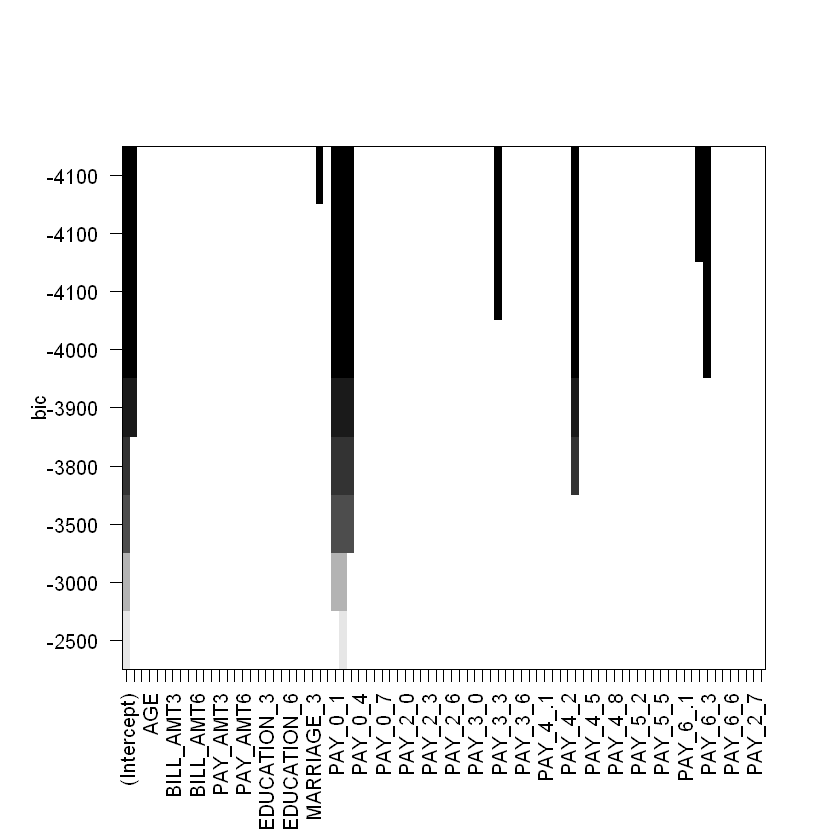

In [29]:
# ploting the bicof backward model
plot(regfit.bwd,scale="bic")

In [30]:
#storing the feature selected based on the backward model by cp coeficient
selection.bwd.cp=names(coef(regfit.bwd,which.min(reg.summary.bwd$cp)))[-1]
#displaying the coeficient and variables name for backward feature selection for CP
coef(regfit.bwd,which.min(reg.summary.bwd$cp))

(Intercept)     LIMIT_BAL      PAY_0_.1       PAY_0_1       PAY_0_2 
 1.647288e-01 -2.363087e-07  4.987549e-02  1.771836e-01  4.881505e-01 
      PAY_0_3       PAY_3_3       PAY_4_3       PAY_6_2       PAY_6_3 
 5.506197e-01  1.373560e-01  2.159969e-02  1.454125e-01  2.212627e-01

In [31]:
#storing the feature selected based on the backward model by bic coeficient
selection.bwd.bic=names(coef(regfit.bwd,which.min(reg.summary.bwd$bic)))[-1]
#displaying the coeficient and variables name for backward feature selection for bic
coef(regfit.bwd,which.min(reg.summary.bwd$bic))

(Intercept)     LIMIT_BAL      PAY_0_.1       PAY_0_1       PAY_0_2 
 1.647288e-01 -2.363087e-07  4.987549e-02  1.771836e-01  4.881505e-01 
      PAY_0_3       PAY_3_3       PAY_4_3       PAY_6_2       PAY_6_3 
 5.506197e-01  1.373560e-01  2.159969e-02  1.454125e-01  2.212627e-01

#### 1.3. Ridge Regression

In [32]:
#define independant variables and dependant variable
# independants
x=model.matrix(default~.,DF)[,-1]
# dependant
y=DF$default

In [33]:
#fdefining range for the lambda
grid=10^seq(10,-2,length=100)
#applying ridge regression
ridge.mod=glmnet(x,y,alpha=0,lambda=grid)

In [34]:
#dimention of model
dim(coef(ridge.mod))

[1]  83 100

In [35]:
# labmbda for row number 63
ridge.mod$lambda[63]
# coeficients of lambda
coef(ridge.mod)[,63]
#sum square of lambda
sqrt(sum(coef(ridge.mod)[-1,63]^2))

[1] 305.3856

(Intercept)     LIMIT_BAL           SEX           AGE     BILL_AMT1 
 2.211374e-01 -6.309711e-10 -4.070556e-05  4.542303e-07 -1.493349e-10 
    BILL_AMT2     BILL_AMT3     BILL_AMT4     BILL_AMT5     BILL_AMT6 
-1.014366e-10 -1.092127e-10 -8.769094e-11 -6.942688e-11 -6.107268e-11 
     PAY_AMT1      PAY_AMT2      PAY_AMT3      PAY_AMT4      PAY_AMT5 
-2.767998e-09 -1.518078e-09 -1.726966e-09 -2.346332e-09 -2.195787e-09 
     PAY_AMT6   EDUCATION_1   EDUCATION_2   EDUCATION_3   EDUCATION_4 
-1.686434e-09 -5.260397e-05  3.655109e-05  4.457355e-05 -2.470738e-04 
  EDUCATION_5   EDUCATION_6    MARRIAGE_1    MARRIAGE_2    MARRIAGE_3 
-2.124314e-04 -1.053003e-04  2.571234e-05 -2.668148e-05  5.776380e-05 
     PAY_0_.1       PAY_0_0       PAY_0_1       PAY_0_2       PAY_0_3 
-8.224136e-05 -2.410258e-04  1.778174e-04  6.837557e-04  7.419761e-04 
      PAY_0_4       PAY_0_5       PAY_0_6       PAY_0_7       PAY_0_8 
 4.908671e-04  4.126971e-04  3.764968e-04  6.021449e-04  5.326384e-04 
     PAY_2_.1       PAY_2_0       PAY_2_1       PAY_2_2       PAY_2_3 
-9.829781e-05 -1.745875e-04 -1.443783e-05  5.072920e-04  4.825312e-04 
      PAY_2_4       PAY_2_5       PAY_2_6       PAY_2_7       PAY_2_8 
 3.874640e-04  5.124579e-04  6.021279e-04  5.324505e-04 -3.020531e-04 
     PAY_3_.1       PAY_3_0       PAY_3_1       PAY_3_2       PAY_3_3 
-1.049302e-04 -1.352399e-04  3.779079e-04  4.479186e-04  5.077306e-04 
      PAY_3_4       PAY_3_5       PAY_3_6       PAY_3_7       PAY_3_8 
 4.552012e-04  3.758265e-04  5.453876e-04  7.304372e-04  3.742536e-04 
     PAY_4_.1       PAY_4_0       PAY_4_1       PAY_4_2       PAY_4_3 
-9.594268e-05 -1.163704e-04  1.055908e-03  4.520864e-04  4.634807e-04 
      PAY_4_4       PAY_4_5       PAY_4_6       PAY_4_7       PAY_4_8 
 6.203680e-04  3.756103e-04  2.399607e-04  7.972744e-04  1.052153e-03 
     PAY_5_.1       PAY_5_0       PAY_5_2       PAY_5_3       PAY_5_4 
-9.962558e-05 -9.902713e-05  4.689892e-04  5.005959e-04  5.273891e-04 
      PAY_5_5       PAY_5_6       PAY_5_7       PAY_5_8      PAY_6_.1 
 3.754553e-04  1.052564e-03  8.039463e-04  1.051798e-03 -8.592183e-05 
      PAY_6_0       PAY_6_2       PAY_6_3       PAY_6_4       PAY_6_5 
-9.977860e-05  4.231007e-04  5.486197e-04  5.863491e-04  5.108431e-04 
      PAY_6_6       PAY_6_7       PAY_6_8 
 7.995357e-04  7.622724e-04  1.052442e-03

[1] 0.004142122

In [36]:
# labmbda for row number 96
ridge.mod$lambda[96]
# coeficients of lambda
coef(ridge.mod)[,96]
#sum square of lambda
sqrt(sum(coef(ridge.mod)[-1,96]^2))

[1] 0.03053856

(Intercept)     LIMIT_BAL           SEX           AGE     BILL_AMT1 
 2.326908e-01 -2.012582e-07 -1.477509e-02  3.032179e-04  2.236868e-08 
    BILL_AMT2     BILL_AMT3     BILL_AMT4     BILL_AMT5     BILL_AMT6 
 1.641367e-07  1.106367e-07 -3.991376e-08 -5.703545e-08  1.467157e-08 
     PAY_AMT1      PAY_AMT2      PAY_AMT3      PAY_AMT4      PAY_AMT5 
-7.626645e-07 -2.782369e-07 -6.094752e-08 -3.866949e-07 -3.842014e-07 
     PAY_AMT6   EDUCATION_1   EDUCATION_2   EDUCATION_3   EDUCATION_4 
-3.369142e-07  2.663328e-03  6.351648e-03  1.236261e-03 -1.068660e-01 
  EDUCATION_5   EDUCATION_6    MARRIAGE_1    MARRIAGE_2    MARRIAGE_3 
-1.045376e-01 -2.574907e-02  1.453644e-02 -3.686596e-04  3.330387e-02 
     PAY_0_.1       PAY_0_0       PAY_0_1       PAY_0_2       PAY_0_3 
 2.425661e-02 -5.586475e-02  8.245237e-02  3.397902e-01  3.495867e-01 
      PAY_0_4       PAY_0_5       PAY_0_6       PAY_0_7       PAY_0_8 
 1.924204e-01  1.538391e-01  1.492140e-02  1.380461e-01  1.280451e-01 
     PAY_2_.1       PAY_2_0       PAY_2_1       PAY_2_2       PAY_2_3 
-7.702089e-03  9.943819e-03 -9.306169e-02  5.264888e-02  5.003632e-02 
      PAY_2_4       PAY_2_5       PAY_2_6       PAY_2_7       PAY_2_8 
-8.248764e-02  2.983699e-01  2.655291e-01  1.319559e-01  1.110757e-01 
     PAY_3_.1       PAY_3_0       PAY_3_1       PAY_3_2       PAY_3_3 
-1.214896e-02 -3.705091e-03 -1.007181e-01  6.482210e-02  1.150711e-01 
      PAY_3_4       PAY_3_5       PAY_3_6       PAY_3_7       PAY_3_8 
-8.831700e-02 -1.843853e-01  1.987624e-01 -3.965195e-02 -6.408997e-01 
     PAY_4_.1       PAY_4_0       PAY_4_1       PAY_4_2       PAY_4_3 
-4.185593e-03 -5.858862e-03  7.851050e-01  5.491460e-02  5.980667e-03 
      PAY_4_4       PAY_4_5       PAY_4_6       PAY_4_7       PAY_4_8 
 1.621711e-01 -1.743484e-01 -3.981426e-01 -3.637698e-03  7.988140e-02 
     PAY_5_.1       PAY_5_0       PAY_5_2       PAY_5_3       PAY_5_4 
-1.887659e-02  2.440941e-03  5.542099e-02  3.369476e-04 -3.794659e-02 
      PAY_5_5       PAY_5_6       PAY_5_7       PAY_5_8      PAY_6_.1 
-6.182055e-02  3.652657e-01  1.609378e-01  9.911181e-02 -1.281154e-02 
      PAY_6_0       PAY_6_2       PAY_6_3       PAY_6_4       PAY_6_5 
-3.361150e-02  4.400546e-02  1.208604e-01  7.343776e-02 -1.058376e-02 
      PAY_6_6       PAY_6_7       PAY_6_8 
 2.312832e-01  4.502092e-03  8.193542e-01

[1] 1.693469

In [37]:
#predict for l = 63
predict(ridge.mod,s=63,type="coefficients")[1:30,]

(Intercept)     LIMIT_BAL           SEX           AGE     BILL_AMT1 
 2.227769e-01 -3.045972e-09 -1.978348e-04  2.214791e-06 -6.664037e-10 
    BILL_AMT2     BILL_AMT3     BILL_AMT4     BILL_AMT5     BILL_AMT6 
-4.309833e-10 -4.703505e-10 -3.670967e-10 -2.806871e-10 -2.405400e-10 
     PAY_AMT1      PAY_AMT2      PAY_AMT3      PAY_AMT4      PAY_AMT5 
-1.331932e-08 -7.297856e-09 -8.269785e-09 -1.129713e-08 -1.054557e-08 
     PAY_AMT6   EDUCATION_1   EDUCATION_2   EDUCATION_3   EDUCATION_4 
-8.108424e-09 -2.529568e-04  1.763589e-04  2.144987e-04 -1.202485e-03 
  EDUCATION_5   EDUCATION_6    MARRIAGE_1    MARRIAGE_2    MARRIAGE_3 
-1.031468e-03 -5.045356e-04  1.245059e-04 -1.291176e-04  2.815277e-04 
     PAY_0_.1       PAY_0_0       PAY_0_1       PAY_0_2       PAY_0_3 
-3.970345e-04 -1.160641e-03  8.512270e-04  3.318602e-03  3.586404e-03

In [38]:
#spliting data to train and test
set.seed(613)
train=sample(1:nrow(x), nrow(x)/3)
test=(-train)
y.test=y[test]

In [39]:
#fiting and evaluating the MSE
ridge.mod=glmnet(x[train,],y[train],alpha=0,lambda=grid, thresh=1e-12)
ridge.pred=predict(ridge.mod,s=4,newx=x[test,])
# MSE of test
mean((ridge.pred-y.test)^2)

[1] 0.1563074

In [40]:
# MSE of test set
mean((mean(y[train])-y.test)^2)

[1] 0.1717081

In [41]:
#fitting ridge by large number of lambda
ridge.pred=predict(ridge.mod,s=1e10,newx=x[test,])
# MSE result
mean((ridge.pred-y.test)^2)

[1] 0.1717081

In [42]:
#predictng by new mdel
ridge.pred=predict(ridge.mod,s=0,newx=x[test,])
mean((ridge.pred-y.test)^2)

[1] 0.1385316

In [43]:
# fitting logistic regression
glm(y~x, subset=train,family='binomial')
#prediction base on the regid
predict(ridge.mod,s=0,type="coefficients")[1:30,]
# selected variables
selection.ridge=names(predict(ridge.mod,s=0,type="coefficients")[1:30,])[-1]


Call:  glm(formula = y ~ x, family = "binomial", subset = train)

Coefficients:
 (Intercept)    xLIMIT_BAL          xSEX          xAGE    xBILL_AMT1  
  -2.842e+00    -1.730e-06    -1.659e-01     3.869e-03    -8.213e-07  
  xBILL_AMT2    xBILL_AMT3    xBILL_AMT4    xBILL_AMT5    xBILL_AMT6  
   3.758e-06     4.147e-07     2.426e-06    -3.364e-06    -1.001e-07  
   xPAY_AMT1     xPAY_AMT2     xPAY_AMT3     xPAY_AMT4     xPAY_AMT5  
  -1.468e-05    -8.029e-06    -4.058e-06    -2.349e-06    -1.754e-06  
   xPAY_AMT6  xEDUCATION_1  xEDUCATION_2  xEDUCATION_3  xEDUCATION_4  
  -5.717e-06    -2.227e-01    -2.727e-01    -3.740e-01    -1.822e+00  
xEDUCATION_5  xEDUCATION_6   xMARRIAGE_1   xMARRIAGE_2   xMARRIAGE_3  
  -1.198e+00            NA     2.259e+00     2.095e+00     2.528e+00  
   xPAY_0_.1      xPAY_0_0      xPAY_0_1      xPAY_0_2      xPAY_0_3  
   7.864e-01     4.610e-02     8.157e-01     2.115e+00     2.082e+00  
    xPAY_0_4      xPAY_0_5      xPAY_0_6      xPAY_0_7      xPAY_0_

(Intercept)     LIMIT_BAL           SEX           AGE     BILL_AMT1 
 2.288562e-01 -2.090859e-07 -2.295943e-02  5.833161e-04  2.762439e-08 
    BILL_AMT2     BILL_AMT3     BILL_AMT4     BILL_AMT5     BILL_AMT6 
 2.568275e-07  5.425834e-08  2.231660e-07 -2.675685e-07 -8.488471e-08 
     PAY_AMT1      PAY_AMT2      PAY_AMT3      PAY_AMT4      PAY_AMT5 
-8.928531e-07 -3.824651e-07 -3.987635e-07 -7.551440e-08 -1.274380e-07 
     PAY_AMT6   EDUCATION_1   EDUCATION_2   EDUCATION_3   EDUCATION_4 
-3.934672e-07  8.756447e-03  3.443296e-03 -1.232292e-02 -1.088486e-01 
  EDUCATION_5   EDUCATION_6    MARRIAGE_1    MARRIAGE_2    MARRIAGE_3 
-8.116619e-02  3.652737e-02  3.867949e-02  1.721189e-02  7.838231e-02 
     PAY_0_.1       PAY_0_0       PAY_0_1       PAY_0_2       PAY_0_3 
 6.700751e-02 -2.593252e-02  1.021877e-01  3.723791e-01  3.671823e-01

[1] 0.06265537

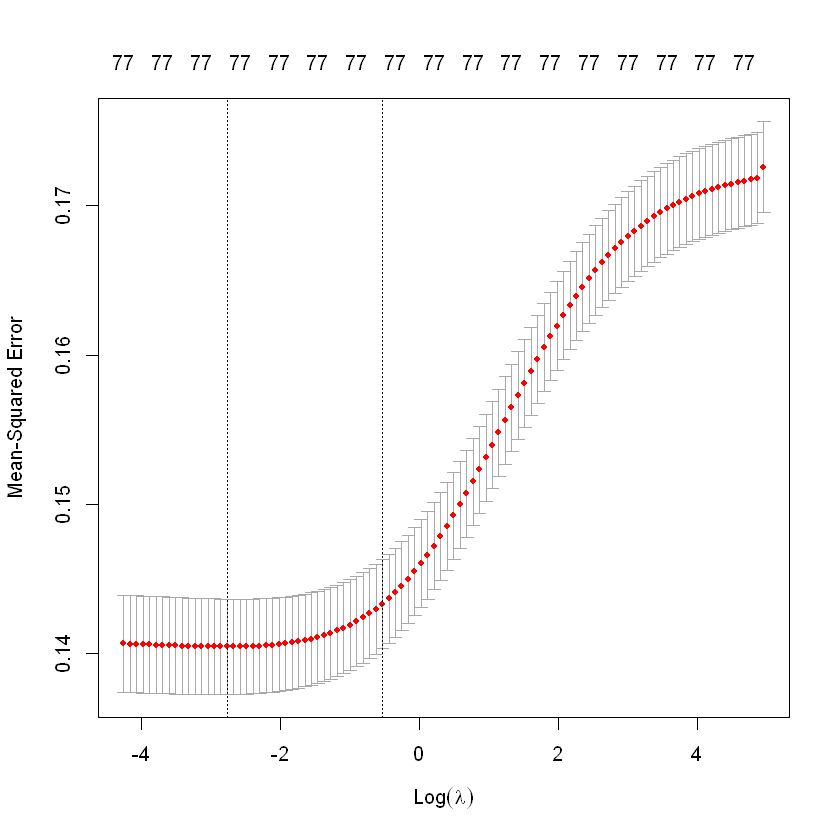

In [44]:
# cross validation for ridge Model
set.seed(613)
cv.out=cv.glmnet(x[train,],y[train],alpha=0)
plot(cv.out)
bestlam=cv.out$lambda.min
bestlam

In [45]:
# making prediction based on the best lambda
ridge.pred=predict(ridge.mod,s=bestlam,newx=x[test,])
mean((ridge.pred-y.test)^2)

[1] 0.1386676

In [46]:
# using the best lambda we fit and predict model for all variables
out=glmnet(x,y,alpha=0)
predict(out,type="coefficients",s=bestlam)[1:30,]

(Intercept)     LIMIT_BAL           SEX           AGE     BILL_AMT1 
 2.454609e-01 -1.911882e-07 -1.442327e-02  2.582486e-04  3.938431e-08 
    BILL_AMT2     BILL_AMT3     BILL_AMT4     BILL_AMT5     BILL_AMT6 
 1.235739e-07  8.459764e-08 -1.392101e-08 -3.048122e-08  8.185225e-09 
     PAY_AMT1      PAY_AMT2      PAY_AMT3      PAY_AMT4      PAY_AMT5 
-7.082264e-07 -2.763124e-07 -1.085084e-07 -4.157103e-07 -3.758251e-07 
     PAY_AMT6   EDUCATION_1   EDUCATION_2   EDUCATION_3   EDUCATION_4 
-3.322285e-07  9.092414e-04  5.605405e-03  1.564177e-03 -1.017728e-01 
  EDUCATION_5   EDUCATION_6    MARRIAGE_1    MARRIAGE_2    MARRIAGE_3 
-9.791595e-02 -2.441331e-02  1.064534e-02 -3.808555e-03  2.852112e-02 
     PAY_0_.1       PAY_0_0       PAY_0_1       PAY_0_2       PAY_0_3 
 1.028156e-02 -6.088700e-02  6.189782e-02  3.024765e-01  3.064402e-01

#### 1.4. Lasso Regression

In [47]:
#fitting the model to train
lasso.mod=glmnet(x[train,],y[train],alpha=1,lambda=grid)
#ploting the results of lasso
plot(lasso.mod)

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"


In [48]:
#cross validating
set.seed(613)
cv.out=cv.glmnet(x[train,],y[train],alpha=1)
#plot of cross validation
plot(cv.out)
# geting the best lambda
bestlam=cv.out$lambda.min
#prediction based on the best lambda
lasso.pred=predict(lasso.mod,s=bestlam,newx=x[test,])
# MSE of model for the best lambda
mean((lasso.pred-y.test)^2)

[1] 0.1388115

In [49]:
#fitting the lasso to all dafa frame
out=glmnet(x,y,alpha=1,lambda=grid)
#Geting the coeficents
lasso.coef=predict(out,type="coefficients",s=bestlam)[1:30,]
lasso.coef
# variables with coeficient
lasso.coef[lasso.coef!=0]
# Get the name of selected variables by lasso
selection.lasso=names(lasso.coef[lasso.coef!=0])[-1]

(Intercept)     LIMIT_BAL           SEX           AGE     BILL_AMT1 
 1.993878e-01 -1.550298e-07  0.000000e+00  0.000000e+00  0.000000e+00 
    BILL_AMT2     BILL_AMT3     BILL_AMT4     BILL_AMT5     BILL_AMT6 
 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 
     PAY_AMT1      PAY_AMT2      PAY_AMT3      PAY_AMT4      PAY_AMT5 
-3.405838e-07 -2.398520e-08  0.000000e+00 -1.226686e-07  0.000000e+00 
     PAY_AMT6   EDUCATION_1   EDUCATION_2   EDUCATION_3   EDUCATION_4 
 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 
  EDUCATION_5   EDUCATION_6    MARRIAGE_1    MARRIAGE_2    MARRIAGE_3 
-1.225853e-02  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 
     PAY_0_.1       PAY_0_0       PAY_0_1       PAY_0_2       PAY_0_3 
 0.000000e+00 -4.320412e-02  6.324034e-02  3.476468e-01  3.180750e-01

(Intercept)     LIMIT_BAL      PAY_AMT1      PAY_AMT2      PAY_AMT4 
 1.993878e-01 -1.550298e-07 -3.405838e-07 -2.398520e-08 -1.226686e-07 
  EDUCATION_5       PAY_0_0       PAY_0_1       PAY_0_2       PAY_0_3 
-1.225853e-02 -4.320412e-02  6.324034e-02  3.476468e-01  3.180750e-01

#### 1.5. PCR regression

In [50]:
# fiting model with cross validation
set.seed(2)
pcr.fit=pcr(default~., data=DF,scale=TRUE,validation="CV")
summary(pcr.fit)

Warning message in FUN(X[[i]], ...):
"Scaling with (near) zero standard deviation"


ERROR: Error in La.svd(X): infinite or missing values in 'x'


In [ ]:
#plot of PCR
validationplot(pcr.fit,val.type="MSEP")

In [ ]:
# Cross validation for PCR for train set
set.seed(613)
pcr.fit=pcr(default~., data=DF,subset=train,scale=TRUE, validation="CV")

In [ ]:
#ploting the results
validationplot(pcr.fit,val.type="MSEP")

In [ ]:
#making prediction
pcr.pred=predict(pcr.fit,x[test,],ncomp=18)
#MSE calculation
mean((pcr.pred-y.test)^2)

In [ ]:
#pcr fiting to whole data
pcr.fit=pcr(y~x,scale=TRUE,ncomp=18)
#summary of PCR
summary(pcr.fit)

In [ ]:
#paring axies to 2 cells
par(mfrow=c(1,2))
coefplot(pcr.fit)
predplot(pcr.fit)

#### 1.6. PCL

In [51]:
##fitting the model with cross validation to train data
set.seed(613)
pls.fit=plsr(default~., data=DF,subset=train,scale=TRUE, validation="CV")
# summary
summary(pls.fit)

Warning message in FUN(X[[i]], ...):
"Scaling with (near) zero standard deviation"
Warning message in FUN(X[[i]], ...):
"Scaling with (near) zero standard deviation"
Warning message in FUN(X[[i]], ...):
"Scaling with (near) zero standard deviation"
Warning message in FUN(X[[i]], ...):
"Scaling with (near) zero standard deviation"
Warning message in FUN(X[[i]], ...):
"Scaling with (near) zero standard deviation"
Warning message in FUN(X[[i]], ...):
"Scaling with (near) zero standard deviation"
Warning message in FUN(X[[i]], ...):
"Scaling with (near) zero standard deviation"
Warning message in FUN(X[[i]], ...):
"Scaling with (near) zero standard deviation"
Warning message in FUN(X[[i]], ...):
"Scaling with (near) zero standard deviation"
Warning message in FUN(X[[i]], ...):
"Scaling with (near) zero standard deviation"
Warning message in pls::mvr(default ~ ., data = DF, subset = train, scale = TRUE, :
"Scaling with (near) zero standard deviation"


Data: 	X dimension: 6666 82 
	Y dimension: 6666 1
Fit method: kernelpls
Number of components considered: 82

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV          0.4155      NaN      NaN      NaN      NaN      NaN      NaN
adjCV       0.4155      NaN      NaN      NaN      NaN      NaN      NaN
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV         NaN      NaN      NaN       NaN       NaN       NaN       NaN
adjCV      NaN      NaN      NaN       NaN       NaN       NaN       NaN
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps  20 comps
CV          NaN       NaN       NaN       NaN       NaN       NaN       NaN
adjCV       NaN       NaN       NaN       NaN       NaN       NaN       NaN
       21 comps  22 comps  23 comps  24 comps  25 comps  26 comps  27 comps
CV          NaN       NaN       NaN       NaN       NaN       NaN       NaN
adjCV       N

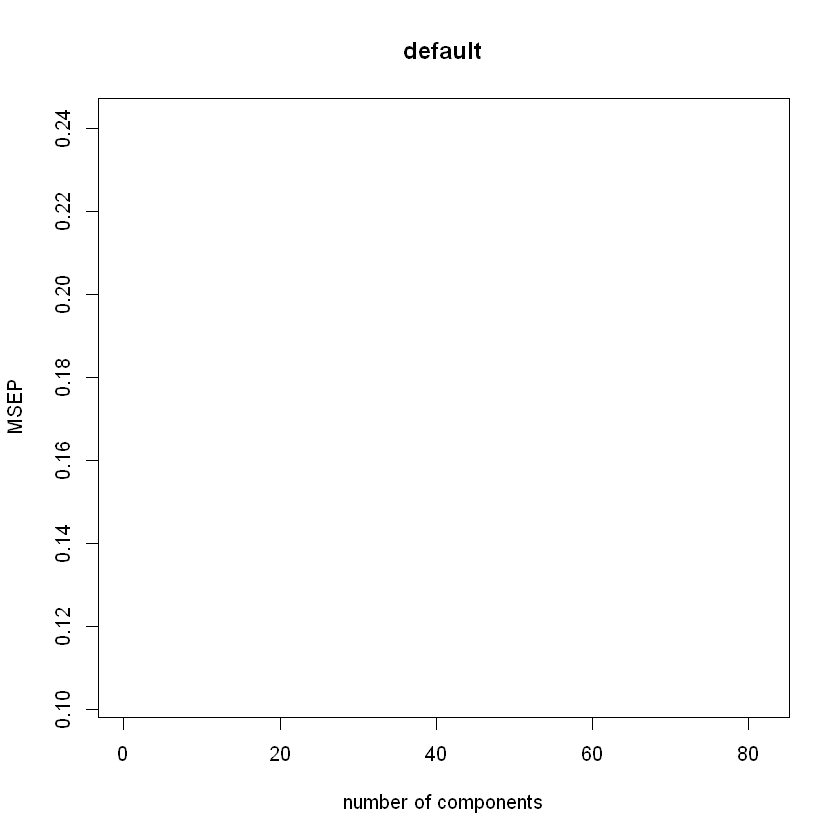

In [52]:
#ploting the result for train
validationplot(pls.fit,val.type="MSEP")

In [53]:
# making prediction
pls.pred=predict(pls.fit,x[test,],ncomp=4)
#calculating the MSE
mean((pls.pred-y.test)^2)

[1] NaN

In [54]:
#fitting the model to whole data based on the number of component
pls.fit=plsr(default~., data=DF,scale=TRUE,ncomp=4)
#summary of model
summary(pls.fit)

Data: 	X dimension: 20000 82 
	Y dimension: 20000 1
Fit method: kernelpls
Number of components considered: 4
TRAINING: % variance explained
         1 comps  2 comps  3 comps  4 comps
X          5.724    14.50    17.83    21.56
default   16.758    18.02    19.45    19.83


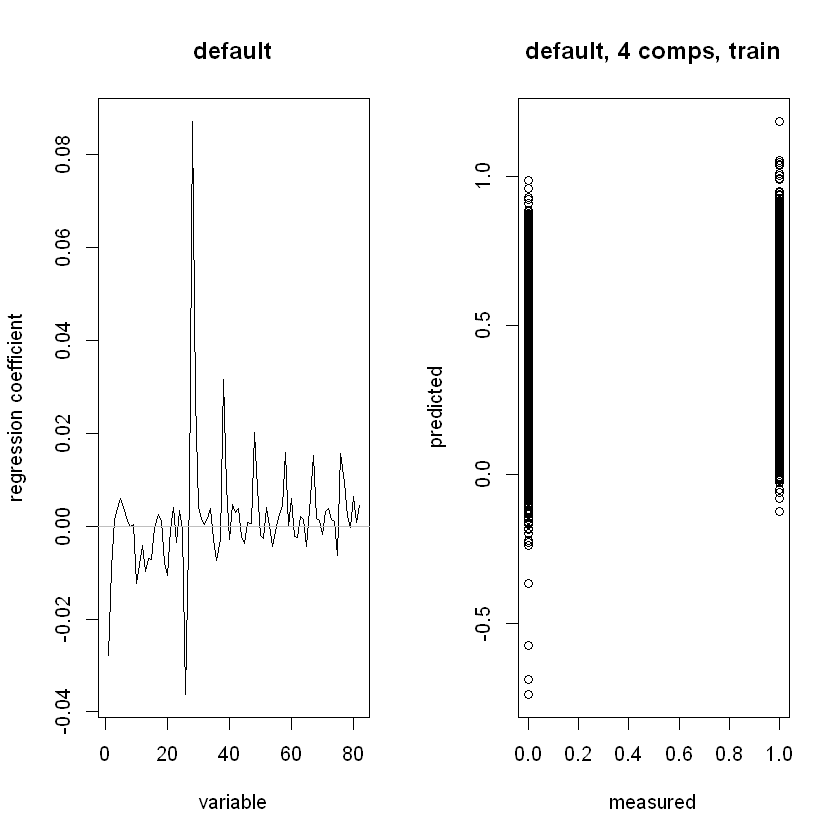

In [55]:
#paring axies to 2 cells
par(mfrow=c(1,2))
coefplot(pls.fit)
predplot(pls.fit)

In [57]:
# selection of forward model based on cp
print('best variables by forward cp')
selection.fwd.cp
# selection of forward model based on bic
print('best variables by forward bic')
selection.fwd.bic
# selection of backward model based on cp
print('best variables by backward cp')
selection.bwd.cp
# selection of backward model based on bic
print('best variables by backward bic')
selection.bwd.bic
# selection of best model by Ridge Regression
print('best variables by Ridge Regression')
selection.ridge
# selection of best model by Lasso Regression
print('best variables by Lasso Regression')
selection.lasso

[1] "best variables by forward cp"


[1] "LIMIT_BAL"   "SEX"         "BILL_AMT2"   "PAY_AMT1"    "PAY_AMT2"   
 [6] "PAY_AMT4"    "PAY_AMT5"    "PAY_AMT6"    "EDUCATION_4" "EDUCATION_5"
[11] "MARRIAGE_2"  "PAY_0_.1"    "PAY_0_1"     "PAY_0_2"     "PAY_0_3"    
[16] "PAY_0_4"     "PAY_0_5"     "PAY_0_8"     "PAY_2_.1"    "PAY_2_1"    
[21] "PAY_2_2"     "PAY_2_4"     "PAY_2_5"     "PAY_3_3"     "PAY_3_4"    
[26] "PAY_3_5"     "PAY_3_7"     "PAY_4_.1"    "PAY_4_2"     "PAY_4_3"    
[31] "PAY_4_5"     "PAY_4_6"     "PAY_4_7"     "PAY_5_0"     "PAY_5_3"    
[36] "PAY_6_.1"    "PAY_6_2"     "PAY_6_3"     "PAY_6_5"     "PAY_6_8"    
[41] "PAY_5_8"

[1] "best variables by forward bic"


[1] "LIMIT_BAL"   "BILL_AMT2"   "PAY_AMT1"    "EDUCATION_5" "MARRIAGE_2" 
 [6] "PAY_0_.1"    "PAY_0_1"     "PAY_0_2"     "PAY_0_3"     "PAY_0_4"    
[11] "PAY_0_8"     "PAY_2_.1"    "PAY_2_2"     "PAY_3_3"     "PAY_3_4"    
[16] "PAY_4_3"     "PAY_4_5"     "PAY_5_3"     "PAY_6_2"     "PAY_6_3"

[1] "best variables by backward cp"


[1] "LIMIT_BAL" "PAY_0_.1"  "PAY_0_1"   "PAY_0_2"   "PAY_0_3"   "PAY_3_3"  
[7] "PAY_4_3"   "PAY_6_2"   "PAY_6_3"

[1] "best variables by backward bic"


[1] "LIMIT_BAL" "PAY_0_.1"  "PAY_0_1"   "PAY_0_2"   "PAY_0_3"   "PAY_3_3"  
[7] "PAY_4_3"   "PAY_6_2"   "PAY_6_3"

[1] "best variables by Ridge Regression"


[1] "LIMIT_BAL"   "SEX"         "AGE"         "BILL_AMT1"   "BILL_AMT2"  
 [6] "BILL_AMT3"   "BILL_AMT4"   "BILL_AMT5"   "BILL_AMT6"   "PAY_AMT1"   
[11] "PAY_AMT2"    "PAY_AMT3"    "PAY_AMT4"    "PAY_AMT5"    "PAY_AMT6"   
[16] "EDUCATION_1" "EDUCATION_2" "EDUCATION_3" "EDUCATION_4" "EDUCATION_5"
[21] "EDUCATION_6" "MARRIAGE_1"  "MARRIAGE_2"  "MARRIAGE_3"  "PAY_0_.1"   
[26] "PAY_0_0"     "PAY_0_1"     "PAY_0_2"     "PAY_0_3"

[1] "best variables by Lasso Regression"


[1] "LIMIT_BAL"   "PAY_AMT1"    "PAY_AMT2"    "PAY_AMT4"    "EDUCATION_5"
[6] "PAY_0_0"     "PAY_0_1"     "PAY_0_2"     "PAY_0_3"

In [81]:
intersect=intersect(
    intersect(
    intersect(
    intersect(
    intersect(selection.fwd.cp,selection.fwd.bic),
    selection.bwd.cp),
    selection.bwd.bic),
    selection.ridge),
    selection.lasso)
intersect

[1] "LIMIT_BAL" "PAY_0_1"   "PAY_0_2"   "PAY_0_3"

In [89]:
common.variables=c('LIMIT_BAL','BILL_AMT2','PAY_AMT4','PAY_0_2','PAY_AMT6','PAY_3_3','PAY_AMT1','PAY_6_2','PAY_6_3')
common.variables

[1] "LIMIT_BAL" "BILL_AMT2" "PAY_AMT4"  "PAY_0_2"   "PAY_AMT6"  "PAY_3_3"  
[7] "PAY_AMT1"  "PAY_6_2"   "PAY_6_3"

### 2. ML Models

#### 2.1. Logistic Regression

In [130]:
#create selection for cross validation
DF_Selected<-DF[,c(common.variables,'default')]

In [131]:
set.seed(613)
#seting the row indexes
index <- sample(1:nrow(DF_Selected), round(0.7 * nrow(DF), 0))
#spliting data based on the index
train <- DF_Selected[index, ]
test <- DF_Selected[-index, ]

In [132]:
#first Logistic to whol data
glm.fits=glm(I(default)~ .,data=train,family=binomial)
summary(glm.fits)


Call:
glm(formula = I(default) ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1711  -0.6475  -0.5870  -0.3438   3.2935  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.307e+00  3.952e-02 -33.074  < 2e-16 ***
LIMIT_BAL   -1.266e-06  2.067e-07  -6.127 8.97e-10 ***
BILL_AMT2    1.237e-06  3.734e-07   3.313 0.000925 ***
PAY_AMT4    -1.424e-05  3.243e-06  -4.390 1.13e-05 ***
PAY_0_2      2.022e+00  6.924e-02  29.199  < 2e-16 ***
PAY_AMT6    -4.964e-06  1.963e-06  -2.529 0.011428 *  
PAY_3_3      8.824e-01  2.174e-01   4.059 4.93e-05 ***
PAY_AMT1    -2.536e-05  4.088e-06  -6.203 5.53e-10 ***
PAY_6_2      9.750e-01  6.773e-02  14.395  < 2e-16 ***
PAY_6_3      1.594e+00  2.504e-01   6.366 1.94e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 14876  on 13999  degrees of freedom
Residual devian

In [133]:
summary(glm.fits)$coef
summary(glm.fits)$coef[,4]

Estimate      Std. Error   z value    Pr(>|z|)     
(Intercept) -1.307262e+00 3.952487e-02 -33.074425 6.932005e-240
LIMIT_BAL   -1.266229e-06 2.066724e-07  -6.126747  8.969408e-10
BILL_AMT2    1.236791e-06 3.733702e-07   3.312506  9.246399e-04
PAY_AMT4    -1.423703e-05 3.243182e-06  -4.389834  1.134371e-05
PAY_0_2      2.021607e+00 6.923571e-02  29.198911 2.001928e-187
PAY_AMT6    -4.964242e-06 1.962658e-06  -2.529347  1.142751e-02
PAY_3_3      8.823935e-01 2.173844e-01   4.059138  4.925419e-05
PAY_AMT1    -2.535866e-05 4.087922e-06  -6.203314  5.528631e-10
PAY_6_2      9.750039e-01 6.773217e-02  14.394989  5.563403e-47
PAY_6_3      1.593956e+00 2.503745e-01   6.366286  1.936608e-10

(Intercept)     LIMIT_BAL     BILL_AMT2      PAY_AMT4       PAY_0_2 
6.932005e-240  8.969408e-10  9.246399e-04  1.134371e-05 2.001928e-187 
     PAY_AMT6       PAY_3_3      PAY_AMT1       PAY_6_2       PAY_6_3 
 1.142751e-02  4.925419e-05  5.528631e-10  5.563403e-47  1.936608e-10

In [134]:
glm.probs=predict(glm.fits,newdata=train,type="response")
glm.probs[1:10]

6794      4065     11976      7623     15322      6396     13642     15071 
0.1162329 0.1197717 0.1366823 0.6536489 0.1715830 0.1970612 0.2050465 0.1940017 
    18252      2308 
0.2038680 0.5532847

In [135]:
GLMDF<-train
GLMDF$predict<- ifelse(glm.probs > 0.5, 1, 0)

In [136]:
confusion_matrix<-gmodels::CrossTable(GLMDF$predict,GLMDF$default)
confusion_matrix


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  14000 

 
              | GLMDF$default 
GLMDF$predict |         0 |         1 | Row Total | 
--------------|-----------|-----------|-----------|
            0 |     10473 |      2243 |     12716 | 
              |    36.341 |   126.259 |           | 
              |     0.824 |     0.176 |     0.908 | 
              |     0.963 |     0.717 |           | 
              |     0.748 |     0.160 |           | 
--------------|-----------|-----------|-----------|
            1 |       398 |       886 |      1284 | 
              |   359.902 |  1250.400 |           | 
              |     0.310 |     0.690 |     0.092 | 
              |     0.037 |     0.283 |           | 
              |     0.028 |     0.063 |           | 
--------------|--------

$t
   y
x       0     1
  0 10473  2243
  1   398   886

$prop.row
   y
x           0         1
  0 0.8236081 0.1763919
  1 0.3099688 0.6900312

$prop.col
   y
x            0          1
  0 0.96338883 0.71684244
  1 0.03661117 0.28315756

$prop.tbl
   y
x            0          1
  0 0.74807143 0.16021429
  1 0.02842857 0.06328571


In [137]:

#head(pred_logreg)

TP<-confusion_matrix$t[2,2]
FP<-confusion_matrix$t[2,1]
TN<-confusion_matrix$t[1,1]
FN<-confusion_matrix$t[1,2]

#accuracy
accuracy<-(TP + TN) / (TP + FP + TN + FN)
#Errors

err_1<-confusion_matrix$prop.col[2,1]
err_2<-confusion_matrix$prop.col[1,2]


print(paste('Accuracy is eual to =', accuracy))
print(paste('error Type One is eual to =', err_1))
print(paste('error Type Two is eual to =', err_2))


[1] "Accuracy is eual to = 0.811357142857143"
[1] "error Type One is eual to = 0.036611167325913"
[1] "error Type Two is eual to = 0.716842441674656"


In [164]:
# Make prediction
pred_logreg <- predict(glm.fits, newdata=train, type='response')

# Decision threshold = 0.5
threshold <- 0.5
pred <- rep(0, nrow(test))
pred[pred_logreg > threshold] <- 1

# Evaluation
table(pred, train$default)
acc <- mean(pred == train$default)
TP <- table(pred, train$default)[2, 2]
TN <- table(pred, train$default)[1, 1]
FP <- table(pred, train$default)[2, 1]
FN <- table(pred, train$default)[1, 2]



# AUC
pred_roc <- pROC::roc(pred, train$default)
pred_auc <- pROC::auc(pred_roc)
print(paste('AUC =', pred_auc))

    
pred    0    1
   0 4523  947
   1  398  886

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC = 0.758452505025998"


In [138]:
# Make prediction
pred_logreg <- predict(glm.fits, newdata=test, type='response')

# Decision threshold = 0.5
threshold <- 0.5
pred <- rep(0, nrow(test))
pred[pred_logreg > threshold] <- 1

# Evaluation
table(pred, test$default)
acc <- mean(pred == test$default)
TP <- table(pred, test$default)[2, 2]
TN <- table(pred, test$default)[1, 1]
FP <- table(pred, test$default)[2, 1]
FN <- table(pred, test$default)[1, 2]

print(paste('Accuracy =', round(acc, 2)))
print(paste('Precision =', round(TP / (TP + FP), 2)))
print(paste('Sensitivity (TPR) =', round(TP / (TP + FN), 2)))
print(paste('Specificity (TNR) =', round(TN / (TN + FP), 2)))

# AUC
pred_roc <- pROC::roc(pred, test$default)
pred_auc <- pROC::auc(pred_roc)
print(paste('AUC =', pred_auc))

    
pred    0    1
   0 4525  930
   1  190  355

[1] "Accuracy = 0.81"
[1] "Precision = 0.65"
[1] "Sensitivity (TPR) = 0.28"
[1] "Specificity (TNR) = 0.96"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC = 0.740445176969198"


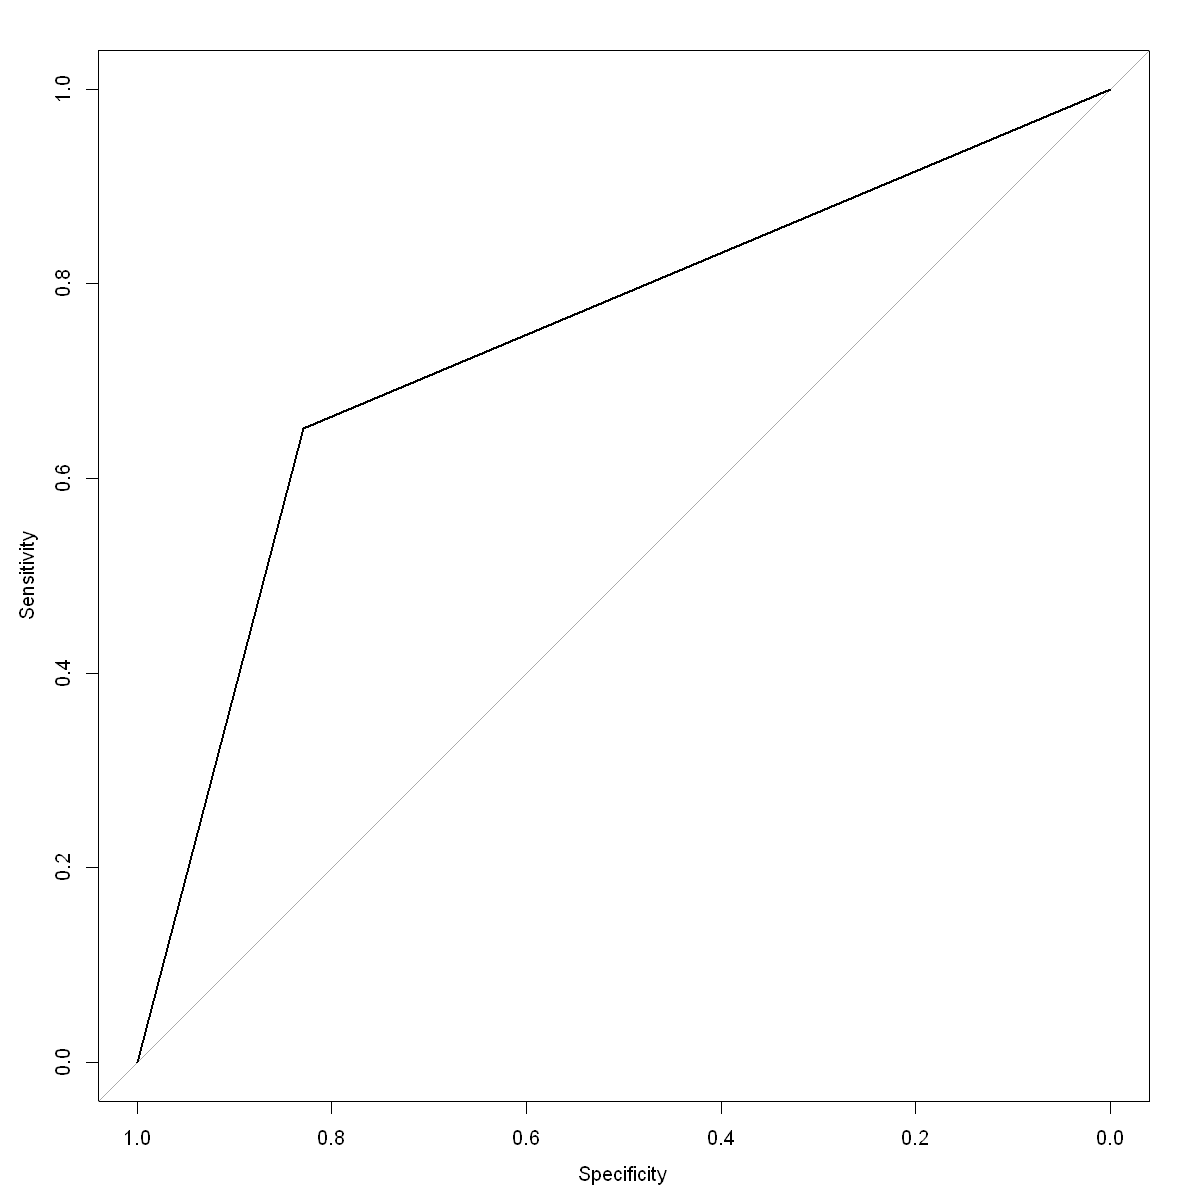

In [139]:
plot(pred_roc)

In [140]:
# Decision threshold = 0.25
threshold <- 0.25
pred <- rep(0, nrow(test))
pred[pred_logreg > threshold] <- 1

# Evaluation
table(pred, test$default)
acc <- mean(pred == test$default)
TP <- table(pred, test$default)[2, 2]
TN <- table(pred, test$default)[1, 1]
FP <- table(pred, test$default)[2, 1]
FN <- table(pred, test$default)[1, 2]

print(paste('Accuracy =', round(acc, 2)))
print(paste('Precision =', round(TP / (TP + FP), 2)))
print(paste('Sensitivity (TPR) =', round(TP / (TP + FN), 2)))
print(paste('Specificity (TNR) =', round(TN / (TN + FP), 2)))

# AUC
pred_roc <- pROC::roc(pred, test$default)
pred_auc <- pROC::auc(pred_roc)
print(paste('AUC =', pred_auc))

    
pred    0    1
   0 4295  781
   1  420  504

[1] "Accuracy = 0.8"
[1] "Precision = 0.55"
[1] "Sensitivity (TPR) = 0.39"
[1] "Specificity (TNR) = 0.91"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC = 0.695796618668959"


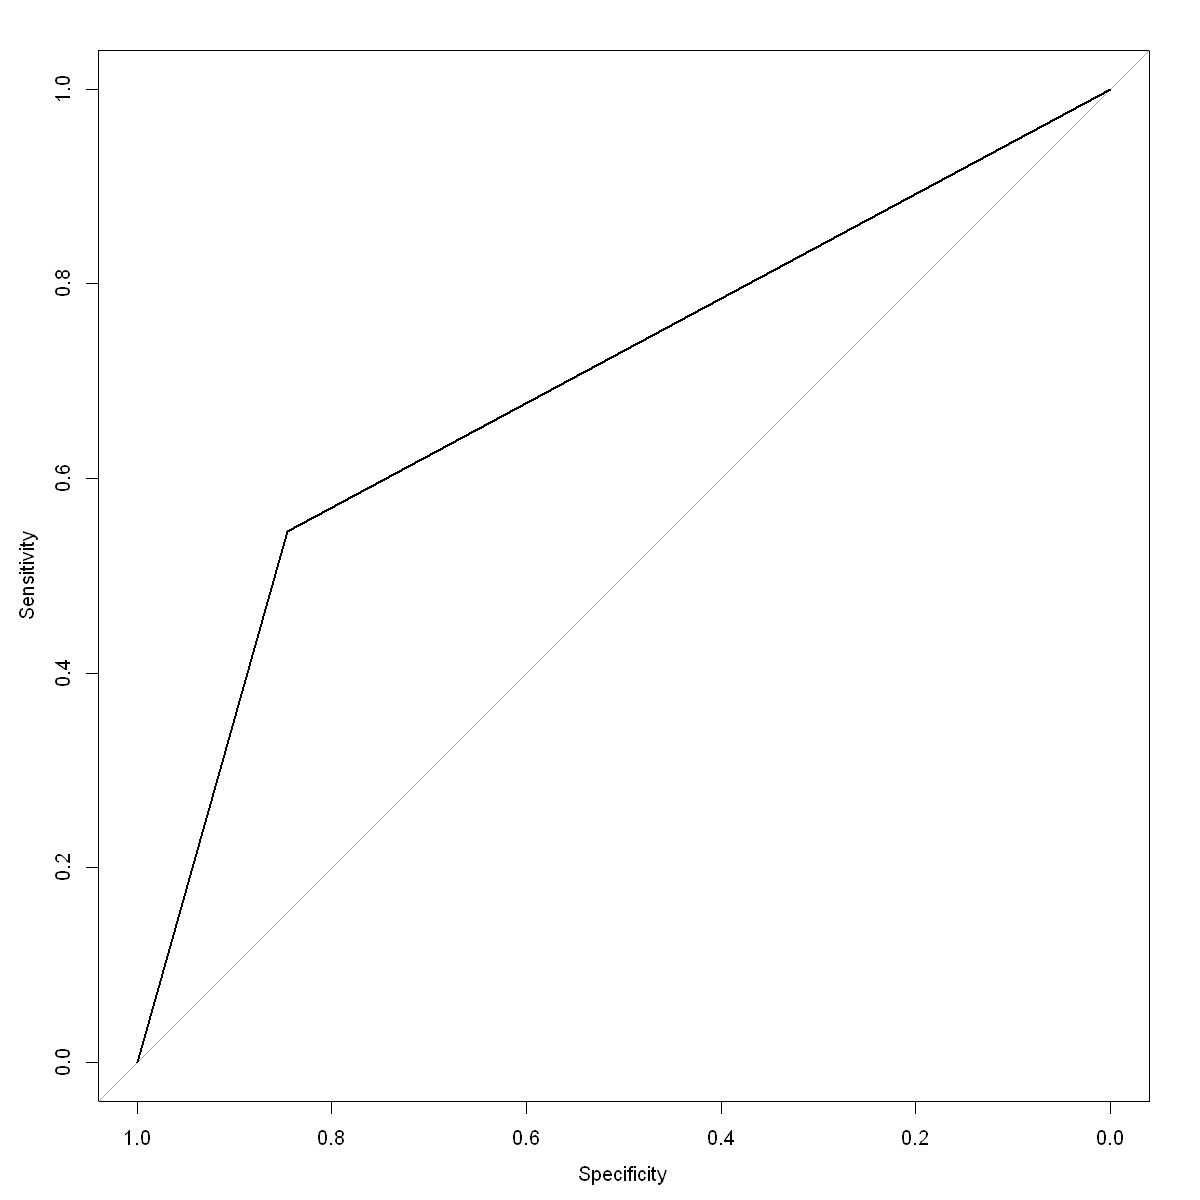

In [141]:
plot(pred_roc)

In [142]:
# Decision threshold = 0.75
threshold <- 0.75
pred <- rep(0, nrow(test))
pred[pred_logreg > threshold] <- 1

# Evaluation
table(pred, test$default)
acc <- mean(pred == test$default)
TP <- table(pred, test$default)[2, 2]
TN <- table(pred, test$default)[1, 1]
FP <- table(pred, test$default)[2, 1]
FN <- table(pred, test$default)[1, 2]

print(paste('Accuracy =', round(acc, 2)))
print(paste('Precision =', round(TP / (TP + FP), 2)))
print(paste('Sensitivity (TPR) =', round(TP / (TP + FN), 2)))
print(paste('Specificity (TNR) =', round(TN / (TN + FP), 2)))

# AUC
pred_roc <- pROC::roc(pred, test$default)
pred_auc <- pROC::auc(pred_roc)
print(paste('AUC =', pred_auc))

    
pred    0    1
   0 4669 1162
   1   46  123

[1] "Accuracy = 0.8"
[1] "Precision = 0.73"
[1] "Sensitivity (TPR) = 0.1"
[1] "Specificity (TNR) = 0.99"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC = 0.76426546950141"


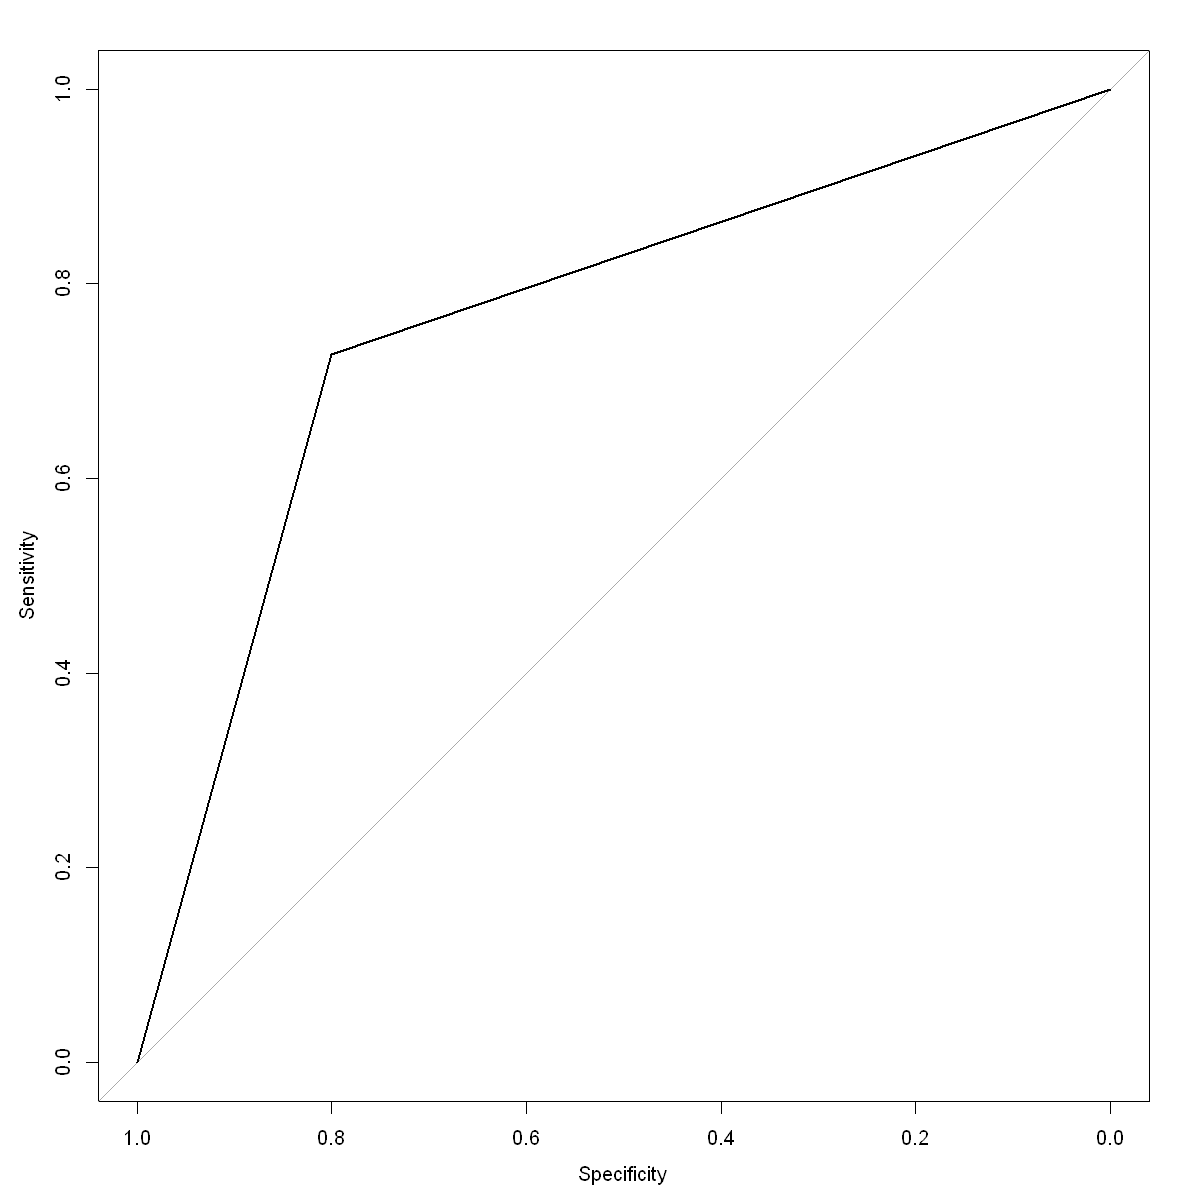

In [143]:
plot(pred_roc)

In [144]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_logreg <- makeLearner("classif.logreg", predict.type="prob", fix.factors.prediction=T)

# Define the model
task_logreg <- makeClassifTask( data=train, target='default')

# Run the k-fold CV
resample(lnr_logreg, task_logreg, rdesc, measures=list(mlr::auc))

Resampling: cross-validation

Measures:             auc       

[Resample] iter 1:    0.6908993 

[Resample] iter 2:    0.7013070 

[Resample] iter 3:    0.7276269 

[Resample] iter 4:    0.7464150 

[Resample] iter 5:    0.7105598 

[Resample] iter 6:    0.7268023 

[Resample] iter 7:    0.7295216 

[Resample] iter 8:    0.7311297 

[Resample] iter 9:    0.7141214 

[Resample] iter 10:   0.7282610 




Aggregated Result: auc.test.mean=0.7206644






Resample Result
Task: train
Learner: classif.logreg
Aggr perf: auc.test.mean=0.7206644
Runtime: 1.19154

In [158]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_logreg <- makeLearner("classif.logreg", predict.type="prob", fix.factors.prediction=T)

# Define the model
task_logreg <- makeClassifTask( data=train, target='default')

# Run the k-fold CV
resample(lnr_logreg, task_logreg, rdesc, measures=list(mlr::acc))

Resampling: cross-validation

Measures:             acc       

[Resample] iter 1:    0.7992857 

[Resample] iter 2:    0.8235714 

[Resample] iter 3:    0.8164286 

[Resample] iter 4:    0.8207143 

[Resample] iter 5:    0.8114286 

[Resample] iter 6:    0.8121429 

[Resample] iter 7:    0.8142857 

[Resample] iter 8:    0.8057143 

[Resample] iter 9:    0.8021429 

[Resample] iter 10:   0.8064286 




Aggregated Result: acc.test.mean=0.8112143






Resample Result
Task: train
Learner: classif.logreg
Aggr perf: acc.test.mean=0.8112143
Runtime: 0.916393

#### 2.2. KNN

In [145]:
# k = 100
set.seed(123)
knn1_pred <- knn(train=train[, common.variables],
                 test=train[,common.variables],
                 cl=train$default,
                 k=10)


# Evaluation
table(knn1_pred, train$default)
acc <- mean(knn1_pred == train$default)
TP <- table(knn1_pred, train$default)[2, 2]
TN <- table(knn1_pred, train$default)[1, 1]
FP <- table(knn1_pred, train$default)[2, 1]
FN <- table(knn1_pred, train$default)[1, 2]

print(paste('Accuracy =', round(acc, 2)))
print(paste('Precision =', round(TP / (TP + FP), 2)))
print(paste('Sensitivity (TPR) =', round(TP / (TP + FN), 2)))
print(paste('Specificity (TNR) =', round(TN / (TN + FP), 2)))

# AUC
pred_roc <- pROC::roc(knn1_pred, train$default)
pred_auc <- pROC::auc(pred_roc)
print(paste('AUC =', pred_auc))

         
knn1_pred     0     1
        0 10529  2609
        1   342   520

[1] "Accuracy = 0.79"
[1] "Precision = 0.6"
[1] "Sensitivity (TPR) = 0.17"
[1] "Specificity (TNR) = 0.97"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC = 0.702332000230288"


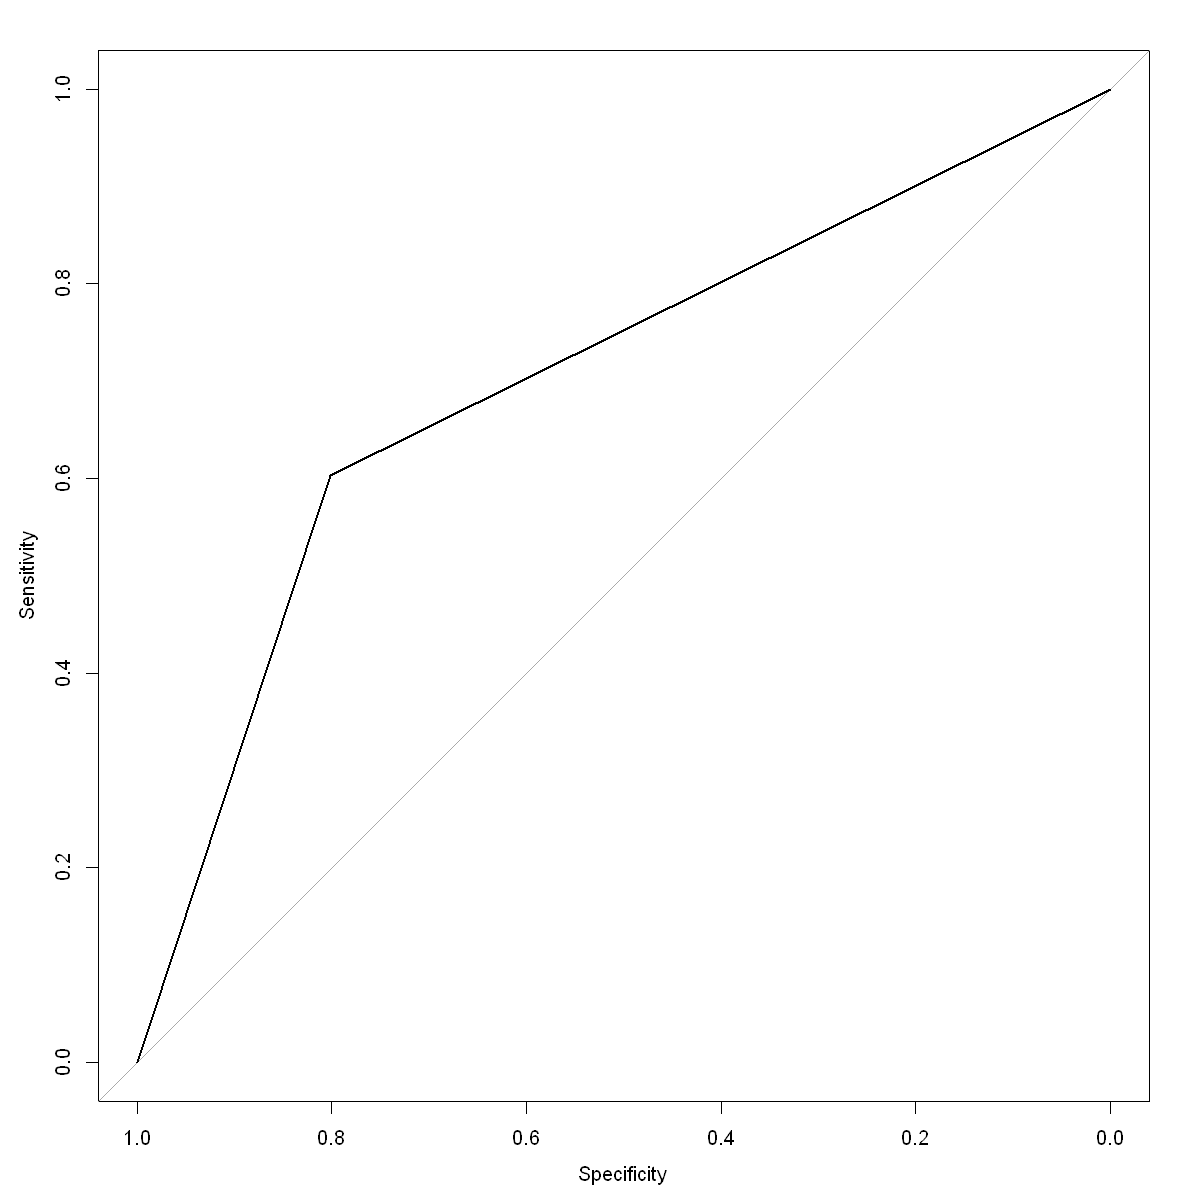

In [146]:
plot(pred_roc)

In [147]:
# k = 100
set.seed(123)
knn1_pred <- knn(train=train[, common.variables],
                 test=test[,common.variables],
                 cl=train$default,
                 k=100)


# Evaluation
table(knn1_pred, test$default)
acc <- mean(knn1_pred == test$default)
TP <- table(knn1_pred, test$default)[2, 2]
TN <- table(knn1_pred, test$default)[1, 1]
FP <- table(knn1_pred, test$default)[2, 1]
FN <- table(knn1_pred, test$default)[1, 2]

print(paste('Accuracy =', round(acc, 2)))
print(paste('Precision =', round(TP / (TP + FP), 2)))
print(paste('Sensitivity (TPR) =', round(TP / (TP + FN), 2)))
print(paste('Specificity (TNR) =', round(TN / (TN + FP), 2)))

# AUC
pred_roc <- pROC::roc(knn1_pred, test$default)
pred_auc <- pROC::auc(pred_roc)
print(paste('AUC =', pred_auc))

         
knn1_pred    0    1
        0 4692 1266
        1   23   19

[1] "Accuracy = 0.79"
[1] "Precision = 0.45"
[1] "Sensitivity (TPR) = 0.01"
[1] "Specificity (TNR) = 1"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC = 0.619946770248885"


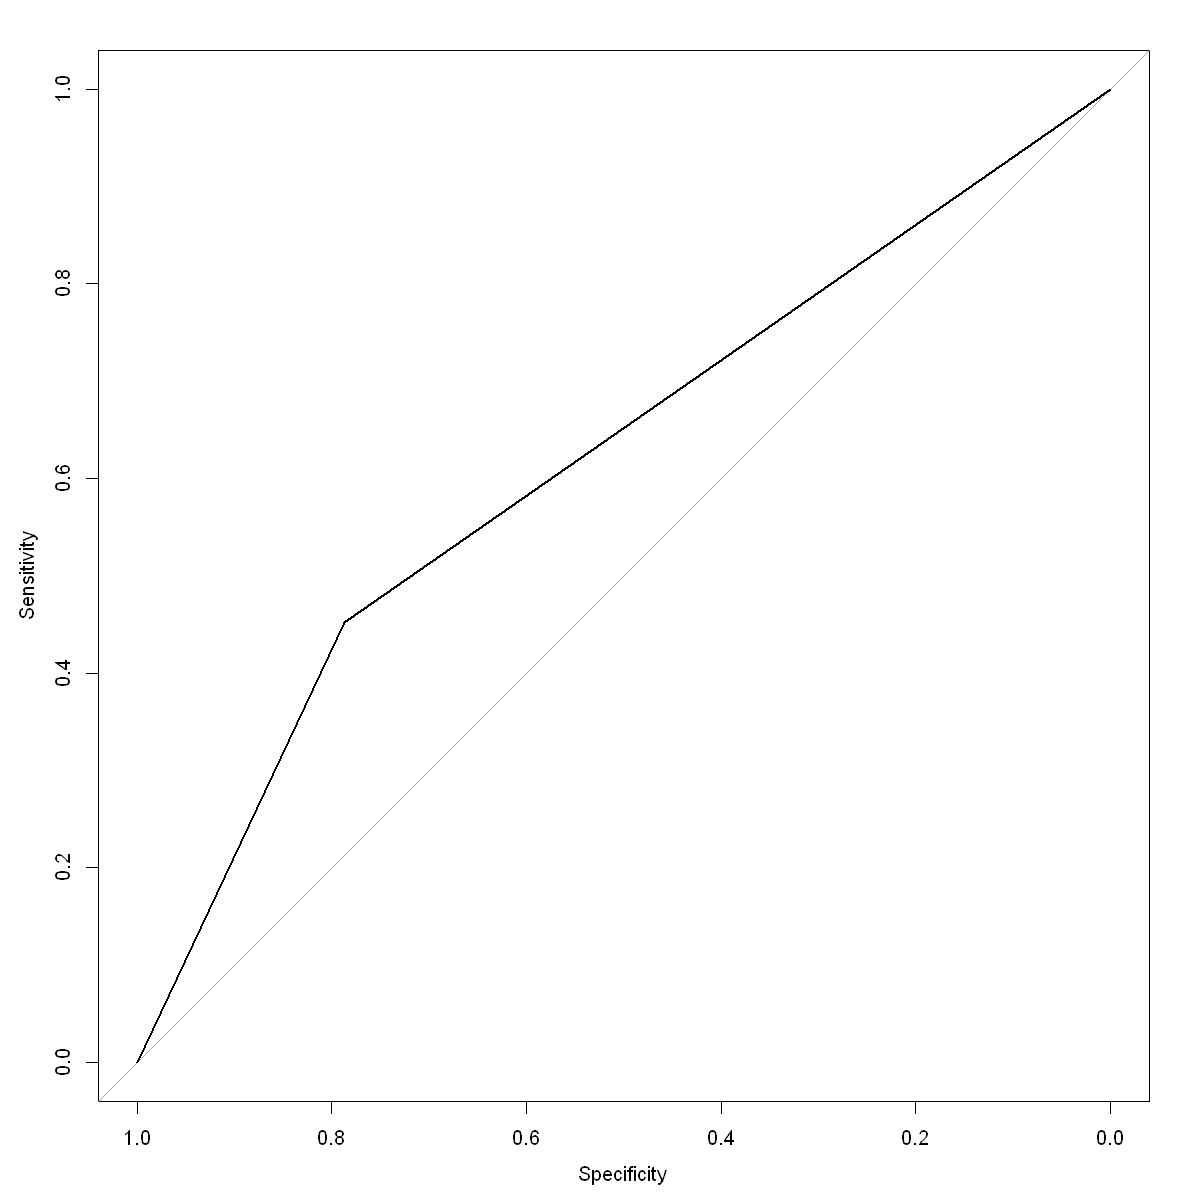

In [148]:
plot(pred_roc)

In [149]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_knn <- makeLearner("classif.kknn", predict.type="prob", fix.factors.prediction=T, k=100)

# Define the model
task_knn <- makeClassifTask( data=train, target='default')

# Run the k-fold CV
resample(lnr_knn, task_knn, rdesc, measures=list(mlr::auc))

Resampling: cross-validation

Measures:             auc       

[Resample] iter 1:    0.7429919 

[Resample] iter 2:    0.7299942 

[Resample] iter 3:    0.7197051 

[Resample] iter 4:    0.7259514 

[Resample] iter 5:    0.7559006 

[Resample] iter 6:    0.7177159 

[Resample] iter 7:    0.7631937 

[Resample] iter 8:    0.7465379 

[Resample] iter 9:    0.7288255 

[Resample] iter 10:   0.7398906 




Aggregated Result: auc.test.mean=0.7370707






Resample Result
Task: train
Learner: classif.kknn
Aggr perf: auc.test.mean=0.7370707
Runtime: 8.27311

In [157]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_knn <- makeLearner("classif.kknn", predict.type="prob", fix.factors.prediction=T, k=100)

# Define the model
task_knn <- makeClassifTask( data=train, target='default')

# Run the k-fold CV
resample(lnr_knn, task_knn, rdesc, measures=list(mlr::acc))

Resampling: cross-validation

Measures:             acc       

[Resample] iter 1:    0.7842857 

[Resample] iter 2:    0.8121429 

[Resample] iter 3:    0.8185714 

[Resample] iter 4:    0.8150000 

[Resample] iter 5:    0.8085714 

[Resample] iter 6:    0.8042857 

[Resample] iter 7:    0.8114286 

[Resample] iter 8:    0.8107143 

[Resample] iter 9:    0.8292857 

[Resample] iter 10:   0.8085714 




Aggregated Result: acc.test.mean=0.8102857






Resample Result
Task: train
Learner: classif.kknn
Aggr perf: acc.test.mean=0.8102857
Runtime: 6.41478

#### Decision Trees

In [150]:
#Create Decision Tree Model
tree_Mod=tree(default~.,train)
summary(tree_Mod)



Regression tree:
tree(formula = default ~ ., data = train)
Variables actually used in tree construction:
[1] "PAY_0_2"   "PAY_AMT1"  "BILL_AMT2" "PAY_6_2"  
Number of terminal nodes:  5 
Residual mean deviance:  0.1452 = 2032 / 14000 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.6917 -0.1366 -0.1366  0.0000 -0.1366  0.8634 

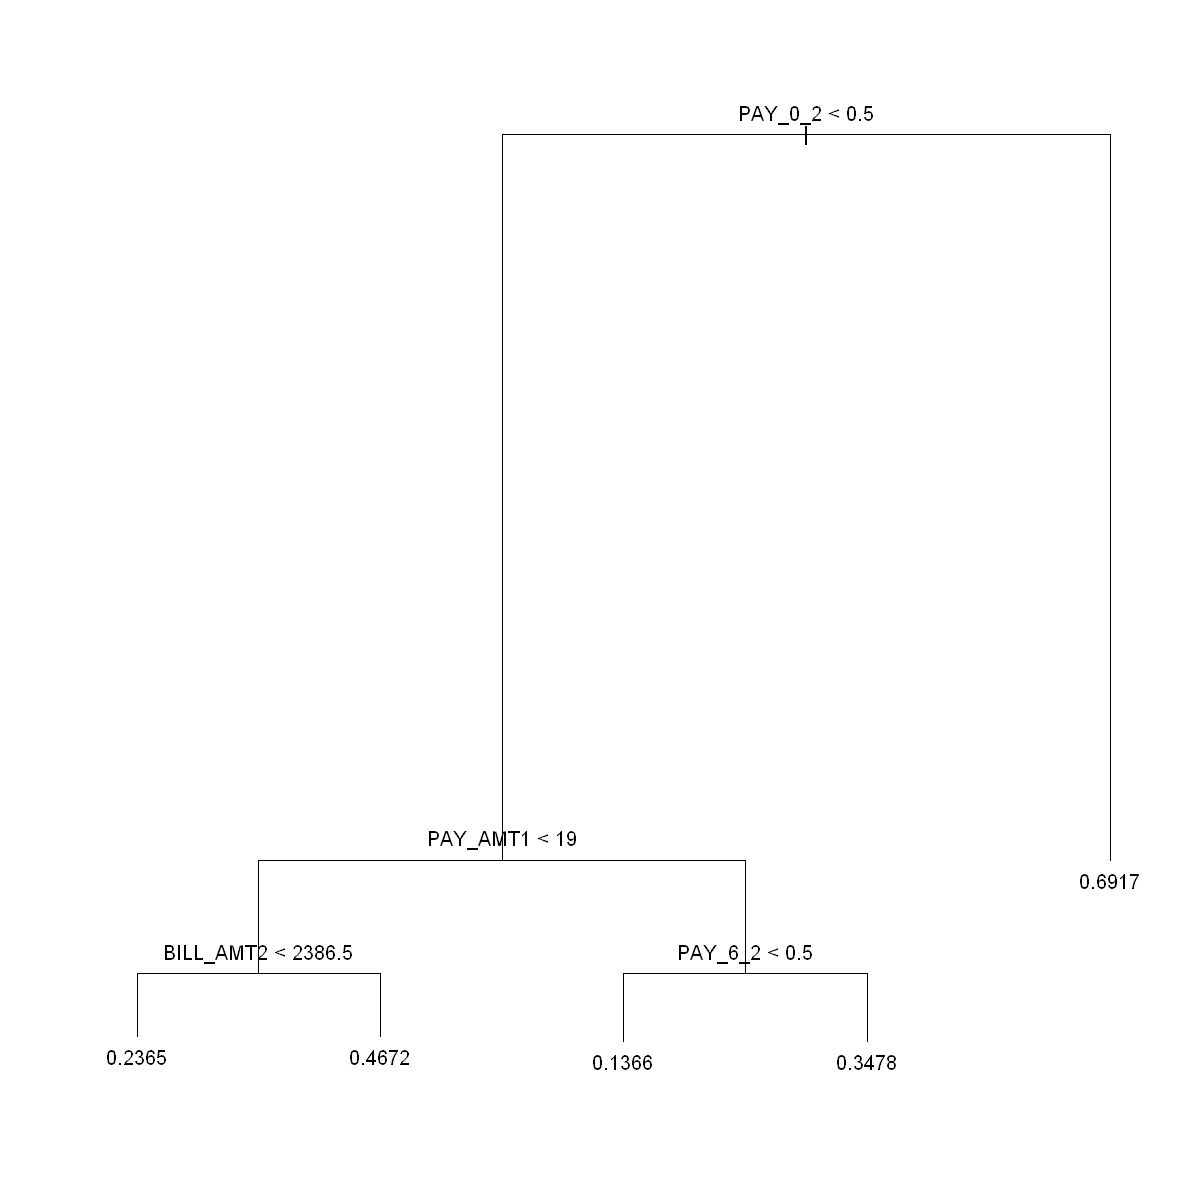

In [151]:
plot(tree_Mod)
text(tree_Mod,pretty=0)

In [152]:
tree.pred=predict(tree_Mod,train)
# Decision threshold = 0.50
threshold <- 0.50
pred <- rep(0, nrow(train))
pred[tree.pred > threshold] <- 1

# Evaluation
table(pred, train$default)
acc <- mean(pred == train$default)
TP <- table(pred, train$default)[2, 2]
TN <- table(pred, train$default)[1, 1]
FP <- table(pred, train$default)[2, 1]
FN <- table(pred, train$default)[1, 2]

print(paste('Accuracy =', round(acc, 2)))
print(paste('Precision =', round(TP / (TP + FP), 2)))
print(paste('Sensitivity (TPR) =', round(TP / (TP + FN), 2)))
print(paste('Specificity (TNR) =', round(TN / (TN + FP), 2)))

# AUC
pred_roc <- pROC::roc(pred, train$default)
pred_auc <- pROC::auc(pred_roc)
print(paste('AUC =', pred_auc))

    
pred     0     1
   0 10489  2272
   1   382   857

[1] "Accuracy = 0.81"
[1] "Precision = 0.69"
[1] "Sensitivity (TPR) = 0.27"
[1] "Specificity (TNR) = 0.96"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC = 0.756822185534403"


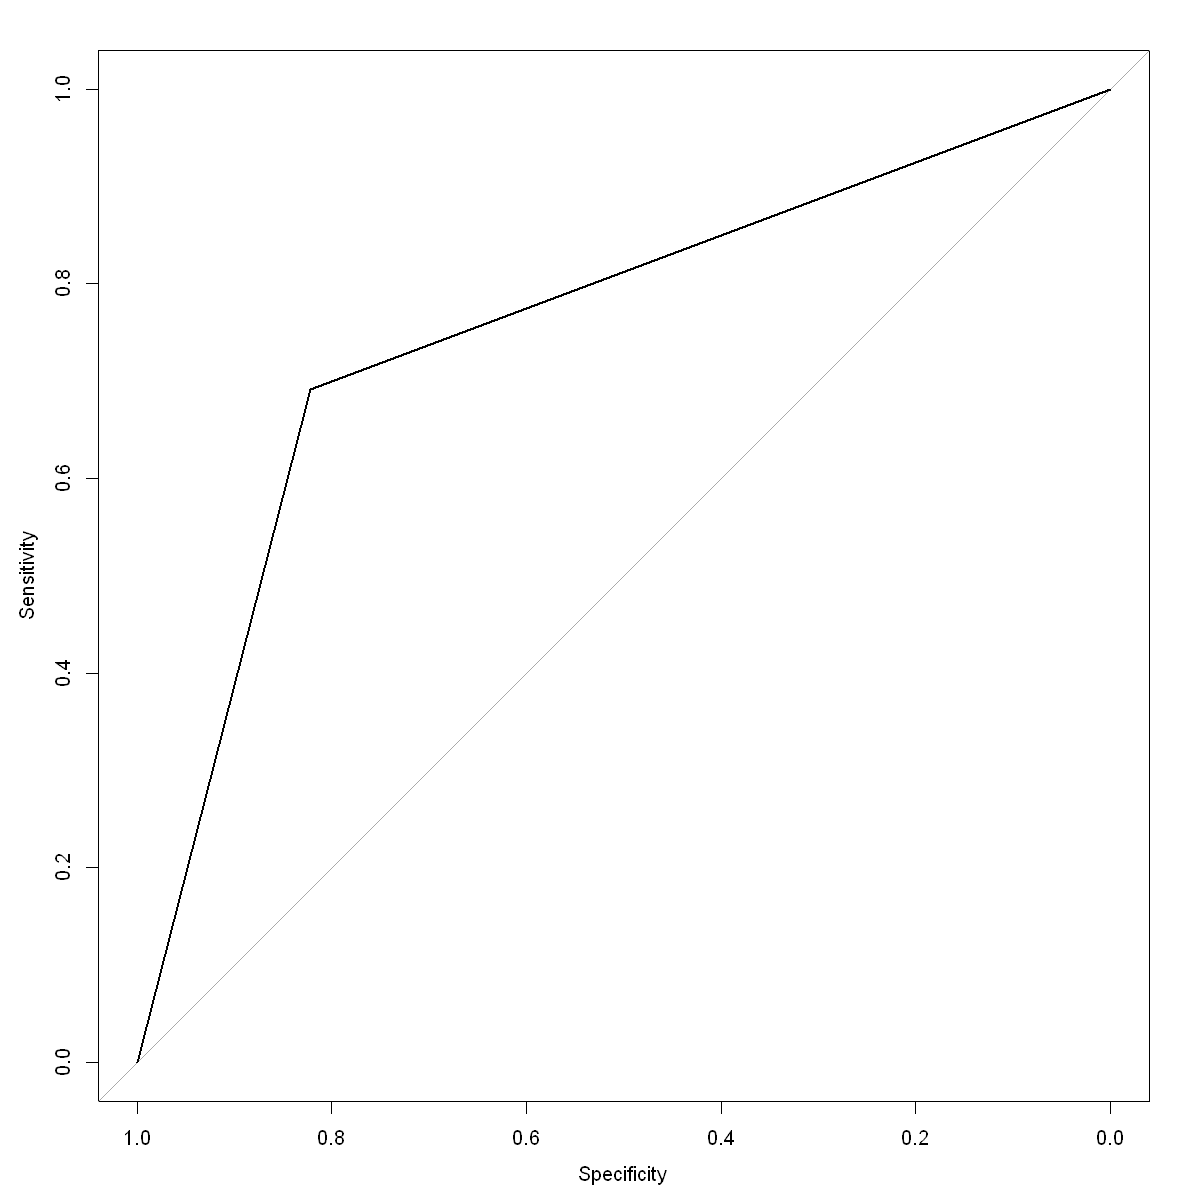

In [153]:
plot(pred_roc)

In [154]:
tree.pred=predict(tree_Mod,test)
# Decision threshold = 0.50
threshold <- 0.50
pred <- rep(0, nrow(test))
pred[tree.pred > threshold] <- 1

# Evaluation
table(pred, test$default)
acc <- mean(pred == test$default)
TP <- table(pred, test$default)[2, 2]
TN <- table(pred, test$default)[1, 1]
FP <- table(pred, test$default)[2, 1]
FN <- table(pred, test$default)[1, 2]

print(paste('Accuracy =', round(acc, 2)))
print(paste('Precision =', round(TP / (TP + FP), 2)))
print(paste('Sensitivity (TPR) =', round(TP / (TP + FN), 2)))
print(paste('Specificity (TNR) =', round(TN / (TN + FP), 2)))

# AUC
pred_roc <- pROC::roc(pred, test$default)
pred_auc <- pROC::auc(pred_roc)
print(paste('AUC =', pred_auc))

    
pred    0    1
   0 4537  944
   1  178  341

[1] "Accuracy = 0.81"
[1] "Precision = 0.66"
[1] "Sensitivity (TPR) = 0.27"
[1] "Specificity (TNR) = 0.96"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC = 0.742400705326757"


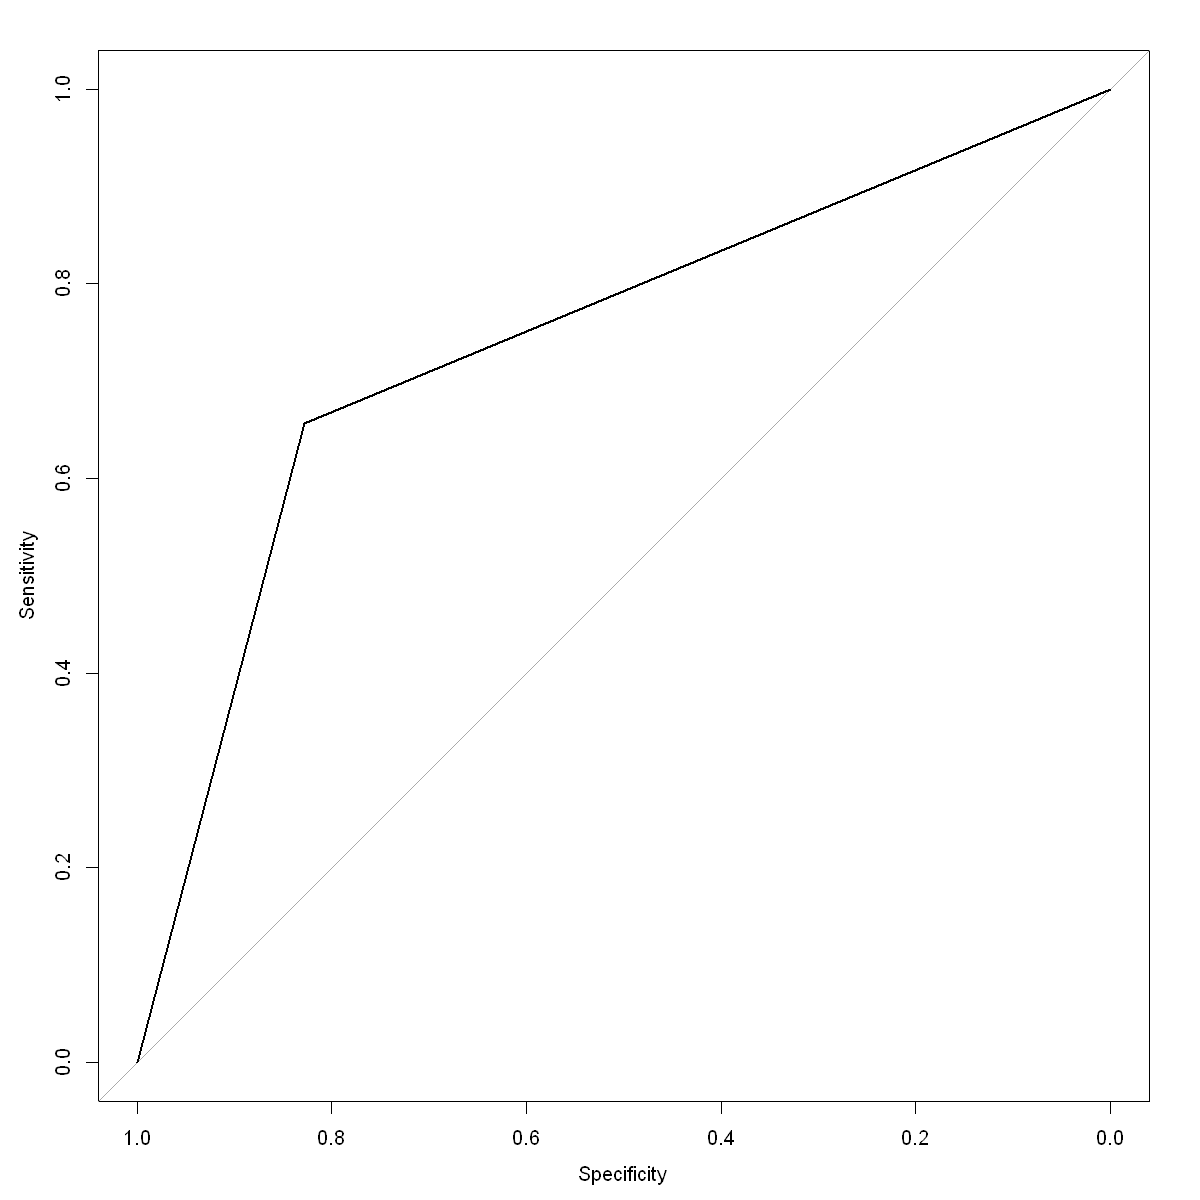

In [155]:
plot(pred_roc)

In [112]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_tree <- makeLearner("classif.rpart", predict.type="prob", fix.factors.prediction=T)

# Define the model
task_tree <- makeClassifTask( data=train, target='default')

# Run the k-fold CV
resample(lnr_tree, task_tree, rdesc, measures=list(mlr::auc))

Resampling: cross-validation

Measures:             auc       

[Resample] iter 1:    0.5995152 

[Resample] iter 2:    0.6208050 

[Resample] iter 3:    0.6158792 

[Resample] iter 4:    0.6240132 

[Resample] iter 5:    0.6139374 

[Resample] iter 6:    0.6184516 

[Resample] iter 7:    0.6379273 

[Resample] iter 8:    0.6229977 

[Resample] iter 9:    0.6205497 

[Resample] iter 10:   0.6188110 




Aggregated Result: auc.test.mean=0.6192887






Resample Result
Task: train
Learner: classif.rpart
Aggr perf: auc.test.mean=0.6192887
Runtime: 0.881731

In [156]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_tree <- makeLearner("classif.rpart", predict.type="prob", fix.factors.prediction=T)

# Define the model
task_tree <- makeClassifTask( data=train, target='default')

# Run the k-fold CV
resample(lnr_tree, task_tree, rdesc, measures=list(mlr::acc))

Resampling: cross-validation

Measures:             acc       

[Resample] iter 1:    0.8200000 

[Resample] iter 2:    0.8157143 

[Resample] iter 3:    0.7971429 

[Resample] iter 4:    0.8135714 

[Resample] iter 5:    0.8028571 

[Resample] iter 6:    0.8028571 

[Resample] iter 7:    0.8264286 

[Resample] iter 8:    0.8171429 

[Resample] iter 9:    0.7978571 

[Resample] iter 10:   0.8107143 




Aggregated Result: acc.test.mean=0.8104286






Resample Result
Task: train
Learner: classif.rpart
Aggr perf: acc.test.mean=0.8104286
Runtime: 0.807625

#### 2.4 Random Forest

In [113]:
#check the structure of train and test
str(train)

'data.frame':	14000 obs. of  10 variables:
 $ LIMIT_BAL: num  360000 90000 260000 110000 180000 50000 10000 70000 50000 40000 ...
 $ BILL_AMT2: int  6571 23153 7516 126322 -698 44413 7718 0 47703 28182 ...
 $ PAY_AMT4 : int  6487 736 1780 1840 2000 2000 1000 0 0 4000 ...
 $ PAY_0_2  : int  0 0 0 1 0 0 0 0 0 0 ...
 $ PAY_AMT6 : num  0 886 0 1648 2000 ...
 $ PAY_3_3  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PAY_AMT1 : num  7148 23153 7516 2437 0 ...
 $ PAY_6_2  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PAY_6_3  : int  0 0 0 0 0 0 0 0 0 1 ...
 $ default  : int  0 0 0 0 1 1 0 0 0 1 ...


In [114]:
#convert target variable to factor for using it in Randon forest and SVM in train set
train_RF<-train
train_RF$default<- as.factor(train_RF$default)
str(train_RF)

'data.frame':	14000 obs. of  10 variables:
 $ LIMIT_BAL: num  360000 90000 260000 110000 180000 50000 10000 70000 50000 40000 ...
 $ BILL_AMT2: int  6571 23153 7516 126322 -698 44413 7718 0 47703 28182 ...
 $ PAY_AMT4 : int  6487 736 1780 1840 2000 2000 1000 0 0 4000 ...
 $ PAY_0_2  : int  0 0 0 1 0 0 0 0 0 0 ...
 $ PAY_AMT6 : num  0 886 0 1648 2000 ...
 $ PAY_3_3  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PAY_AMT1 : num  7148 23153 7516 2437 0 ...
 $ PAY_6_2  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PAY_6_3  : int  0 0 0 0 0 0 0 0 0 1 ...
 $ default  : Factor w/ 2 levels "0","1": 1 1 1 1 2 2 1 1 1 2 ...


In [115]:
#convert target variable to factor for using it in Randon forest and SVM in test set
test_RF<-test
test_RF$default<- as.factor(test_RF$default)
str(test_RF)

'data.frame':	6000 obs. of  10 variables:
 $ LIMIT_BAL: num  70000 250000 100000 330000 30000 200000 80000 200000 60000 150000 ...
 $ BILL_AMT2: int  23149 6729 75377 23240 18225 0 43709 30928 42381 137472 ...
 $ PAY_AMT4 : int  1000 0 2805 560 0 0 1610 15002 1800 2000 ...
 $ PAY_0_2  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PAY_AMT6 : num  2000 0 2680 201134 0 ...
 $ PAY_3_3  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PAY_AMT1 : num  1700 2000 0 25487 0 ...
 $ PAY_6_2  : int  0 0 0 0 0 0 0 1 1 0 ...
 $ PAY_6_3  : int  0 0 0 0 1 0 0 0 0 0 ...
 $ default  : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 1 1 2 1 ...


In [116]:
#creation of Random Forest Model
bag_Mod<-randomForest(default~.,data=train_RF,mtry=100)
summary(bag_Mod)


Warning message in randomForest.default(m, y, ...):
"invalid mtry: reset to within valid range"


                Length Class  Mode     
call                4  -none- call     
type                1  -none- character
predicted       14000  factor numeric  
err.rate         1500  -none- numeric  
confusion           6  -none- numeric  
votes           28000  matrix numeric  
oob.times       14000  -none- numeric  
classes             2  -none- character
importance          9  -none- numeric  
importanceSD        0  -none- NULL     
localImportance     0  -none- NULL     
proximity           0  -none- NULL     
ntree               1  -none- numeric  
mtry                1  -none- numeric  
forest             14  -none- list     
y               14000  factor numeric  
test                0  -none- NULL     
inbag               0  -none- NULL     
terms               3  terms  call     

MeanDecreaseGini
LIMIT_BAL  554.82332      
BILL_AMT2 1138.99436      
PAY_AMT4   707.60855      
PAY_0_2    596.99588      
PAY_AMT6   709.90110      
PAY_3_3     21.51062      
PAY_AMT1   782.27037      
PAY_6_2     87.18764      
PAY_6_3     19.05113

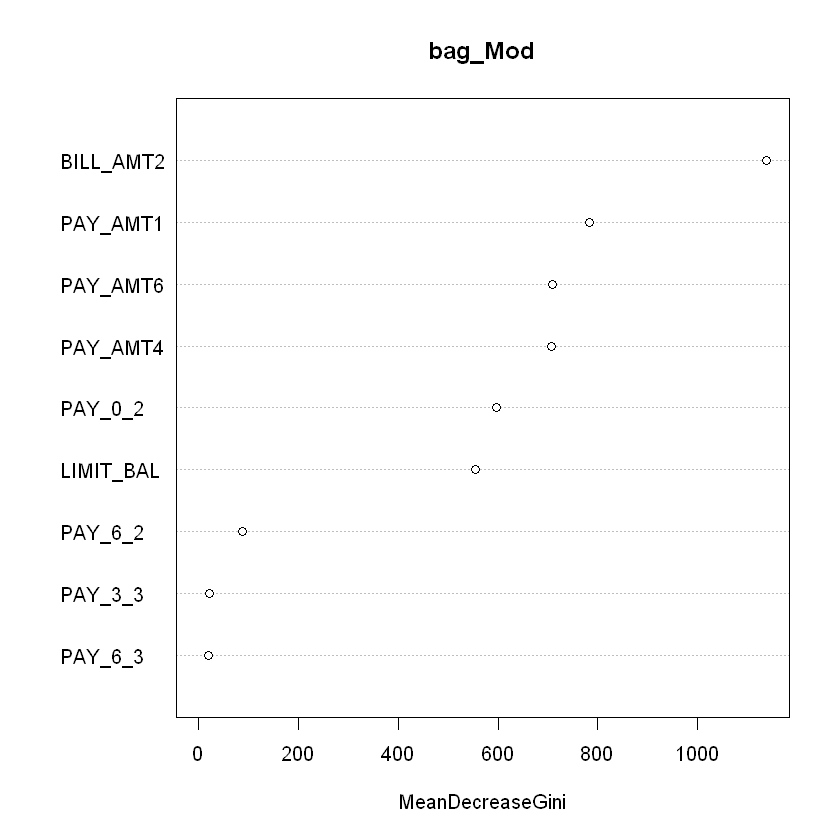

In [117]:
importance(bag_Mod)
varImpPlot(bag_Mod)

In [118]:
bag.pred = predict(bag_Mod,newdata=train_RF)
# Evaluation
table(bag.pred, train$default)
acc <- mean(bag.pred == train$default)
TP <- table(bag.pred, train$default)[2, 2]
TN <- table(bag.pred, train$default)[1, 1]
FP <- table(bag.pred, train$default)[2, 1]
FN <- table(bag.pred, train$default)[1, 2]

print(paste('Accuracy =', round(acc, 2)))
print(paste('Precision =', round(TP / (TP + FP), 2)))
print(paste('Sensitivity (TPR) =', round(TP / (TP + FN), 2)))
print(paste('Specificity (TNR) =', round(TN / (TN + FP), 2)))

# AUC
pred_roc <- pROC::roc(bag.pred, train$default)
pred_auc <- pROC::auc(pred_roc)
print(paste('AUC =', pred_auc))

        
bag.pred     0     1
       0 10855   185
       1    16  2944

[1] "Accuracy = 0.99"
[1] "Precision = 0.99"
[1] "Sensitivity (TPR) = 0.94"
[1] "Specificity (TNR) = 1"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC = 0.988918674108891"


In [ ]:
plot(pred_roc)

In [119]:
bag.pred = predict(bag_Mod,newdata=test_RF)
# Evaluation
table(bag.pred, test$default)
acc <- mean(bag.pred == test$default)
TP <- table(bag.pred, test$default)[2, 2]
TN <- table(bag.pred, test$default)[1, 1]
FP <- table(bag.pred, test$default)[2, 1]
FN <- table(bag.pred, test$default)[1, 2]

print(paste('Accuracy =', round(acc, 2)))
print(paste('Precision =', round(TP / (TP + FP), 2)))
print(paste('Sensitivity (TPR) =', round(TP / (TP + FN), 2)))
print(paste('Specificity (TNR) =', round(TN / (TN + FP), 2)))

# AUC
pred_roc <- pROC::roc(bag.pred, test$default)
pred_auc <- pROC::auc(pred_roc)
print(paste('AUC =', pred_auc))

        
bag.pred    0    1
       0 4402  866
       1  313  419

[1] "Accuracy = 0.8"
[1] "Precision = 0.57"
[1] "Sensitivity (TPR) = 0.33"
[1] "Specificity (TNR) = 0.93"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC = 0.704007804623026"


In [ ]:
plot(pred_roc)

In [159]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_RF <- makeLearner("classif.randomForest", predict.type="prob", fix.factors.prediction=T)

# Define the model
task_RF <- makeClassifTask( data=train_RF, target='default')

# Run the k-fold CV
resample(lnr_RF, task_RF, rdesc, measures=list(mlr::auc))

Resampling: cross-validation

Measures:             auc       

[Resample] iter 1:    0.7332602 

[Resample] iter 2:    0.7232351 

[Resample] iter 3:    0.7155263 

[Resample] iter 4:    0.6992879 

[Resample] iter 5:    0.6965380 

[Resample] iter 6:    0.7208646 

[Resample] iter 7:    0.7174406 

[Resample] iter 8:    0.7459228 

[Resample] iter 9:    0.7066617 

[Resample] iter 10:   0.7287295 




Aggregated Result: auc.test.mean=0.7187467






Resample Result
Task: train_RF
Learner: classif.randomForest
Aggr perf: auc.test.mean=0.7187467
Runtime: 149.488

In [160]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_RF <- makeLearner("classif.randomForest", predict.type="prob", fix.factors.prediction=T)

# Define the model
task_RF <- makeClassifTask( data=train_RF, target='default')

# Run the k-fold CV
resample(lnr_RF, task_RF, rdesc, measures=list(mlr::acc))

Resampling: cross-validation

Measures:             acc       

[Resample] iter 1:    0.7928571 

[Resample] iter 2:    0.8314286 

[Resample] iter 3:    0.8042857 

[Resample] iter 4:    0.8071429 

[Resample] iter 5:    0.7942857 

[Resample] iter 6:    0.8092857 

[Resample] iter 7:    0.8028571 

[Resample] iter 8:    0.8085714 

[Resample] iter 9:    0.8142857 

[Resample] iter 10:   0.8057143 




Aggregated Result: acc.test.mean=0.8070714






Resample Result
Task: train_RF
Learner: classif.randomForest
Aggr perf: acc.test.mean=0.8070714
Runtime: 155.801

#### 2.5 SVM

In [121]:
svm_Mod<-svm(default~., data=train_RF, type = 'C-classification', kernel = 'linear')
summary(svm_Mod)



Call:
svm(formula = default ~ ., data = train_RF, type = "C-classification", 
    kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  5420

 ( 2728 2692 )


Number of Classes:  2 

Levels: 
 0 1




In [122]:
svm.pred=predict(svm_Mod,train_RF)
# Evaluation
table(svm.pred, train$default)
acc <- mean(svm.pred == train$default)
TP <- table(svm.pred, train$default)[2, 2]
TN <- table(svm.pred, train$default)[1, 1]
FP <- table(svm.pred, train$default)[2, 1]
FN <- table(svm.pred, train$default)[1, 2]

print(paste('Accuracy =', round(acc, 2)))
print(paste('Precision =', round(TP / (TP + FP), 2)))
print(paste('Sensitivity (TPR) =', round(TP / (TP + FN), 2)))
print(paste('Specificity (TNR) =', round(TN / (TN + FP), 2)))

# AUC
pred_roc <- pROC::roc(svm.pred, train$default)
pred_auc <- pROC::auc(pred_roc)
print(paste('AUC =', pred_auc))

        
svm.pred     0     1
       0 10465  2237
       1   406   892

[1] "Accuracy = 0.81"
[1] "Precision = 0.69"
[1] "Sensitivity (TPR) = 0.29"
[1] "Specificity (TNR) = 0.96"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC = 0.755548548097566"


In [123]:
plot(pred_roc)

In [124]:
svm.pred=predict(svm_Mod,test_RF)
# Evaluation
table(svm.pred, test$default)
acc <- mean(svm.pred == test$default)
TP <- table(svm.pred, test$default)[2, 2]
TN <- table(svm.pred, test$default)[1, 1]
FP <- table(svm.pred, test$default)[2, 1]
FN <- table(svm.pred, test$default)[1, 2]

print(paste('Accuracy =', round(acc, 2)))
print(paste('Precision =', round(TP / (TP + FP), 2)))
print(paste('Sensitivity (TPR) =', round(TP / (TP + FN), 2)))
print(paste('Specificity (TNR) =', round(TN / (TN + FP), 2)))

# AUC
pred_roc <- pROC::roc(svm.pred, test$default)
pred_auc <- pROC::auc(pred_roc)
print(paste('AUC =', pred_auc))

        
svm.pred    0    1
       0 4527  932
       1  188  353

[1] "Accuracy = 0.81"
[1] "Precision = 0.65"
[1] "Sensitivity (TPR) = 0.27"
[1] "Specificity (TNR) = 0.96"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC = 0.740884069753386"


In [125]:
plot(pred_roc)

In [161]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_SVM <- makeLearner("classif.svm", predict.type="prob", fix.factors.prediction=T)

# Define the model
task_SVM <- makeClassifTask( data=train_RF, target='default')

# Run the k-fold CV
resample(lnr_SVM, task_SVM, rdesc, measures=list(mlr::auc))

Resampling: cross-validation

Measures:             auc       

[Resample] iter 1:    0.6650109 

[Resample] iter 2:    0.6742720 

[Resample] iter 3:    0.6497460 

[Resample] iter 4:    0.6946394 

[Resample] iter 5:    0.6721976 

[Resample] iter 6:    0.6794256 

[Resample] iter 7:    0.7052944 

[Resample] iter 8:    0.6693722 

[Resample] iter 9:    0.6732909 

[Resample] iter 10:   0.6456514 




Aggregated Result: auc.test.mean=0.6728901






Resample Result
Task: train_RF
Learner: classif.svm
Aggr perf: auc.test.mean=0.6728901
Runtime: 1231.5

In [162]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_SVM <- makeLearner("classif.svm", predict.type="prob", fix.factors.prediction=T)

# Define the model
task_SVM <- makeClassifTask( data=train_RF, target='default')

# Run the k-fold CV
resample(lnr_SVM, task_SVM, rdesc, measures=list(mlr::acc))

Resampling: cross-validation

Measures:             acc       

[Resample] iter 1:    0.8150000 

[Resample] iter 2:    0.8150000 

[Resample] iter 3:    0.8142857 

[Resample] iter 4:    0.8207143 

[Resample] iter 5:    0.8014286 

[Resample] iter 6:    0.8221429 

[Resample] iter 7:    0.8114286 

[Resample] iter 8:    0.8064286 

[Resample] iter 9:    0.7942857 

[Resample] iter 10:   0.8114286 




Aggregated Result: acc.test.mean=0.8112143






Resample Result
Task: train_RF
Learner: classif.svm
Aggr perf: acc.test.mean=0.8112143
Runtime: 1061.76